# 1. Opis i razumevanje problema

## 1.1. Uvod i opis problema

Auto dileri često kupuju polovna vozila na aukcijama sa namerom da ih kupe u što boljem stanju. Međutim, postoji značajan rizik od kupovine vozila koja imaju skrivene mane, zbog kojih ne mogu biti dalje prodavana.

Dileri polovnih automobila se suočavaju sa problemom identifikacije vozila koja imaju skrivene mehaničke ili druge ozbiljne probleme. Takva vozila su poznata kao "kicks"(loša kupovina), i njihova kupovina može dovesti do značajnih finansijskih gubitaka za dilere.

## 1.2. Koji su izazovi u rešavanju problema

1. Nepotpuni podaci: Često su podaci o vozilima nepotpuni ili netačni, što otežava procenu stvarnog stanja vozila.
2. Složenost predikcije: Razvijanje modela koji može tačno predvideti koje će vozilo biti "kick" zahteva napredne tehnike mašinskog učenja i analize podataka.
3. Varijabilnost uslova: Uslovi aukcija i vozila mogu značajno varirati, što dodaje složenost u izradi univerzalnog predikcionog modela.

## 1.3. Zašto i kome je bitan 

Predikcija "kick" vozila je ključna jer pomaže dilerima da minimiziraju rizik od kupovine problematičnih automobila, što direktno utiče na njihove profite. Takođe, omogućava im da ponude kvalitetniji izbor vozila svojim kupcima, što može povećati zadovoljstvo kupaca i njihovu lojalnost.

Ovaj problem je bitan:
1. Auto dilerima: Direktno pomaže u smanjenju gubitaka i poboljšanju efikasnosti poslovanja.
2. Kupcima: Kupci imaju veće šanse da dobiju vozila u dobrom stanju, što povećava njihovo zadovoljstvo i poverenje u dilera.
3. Industriji polovnih automobila: Unapređenje kvaliteta vozila na tržištu polovnih automobila može doprineti ukupnom poverenju u ovu industriju.

# 2. Opis i razumevanje podataka

In [1]:
# data process
import numpy as np 
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# modeling
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from scipy.stats import shapiro
from sklearn.model_selection import GridSearchCV

# system
import os
import sys

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('training.csv')
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


## 2.1. Analiza i vizuelizacija podataka

In [3]:
df.shape

(72983, 34)

In [4]:
df.dtypes

RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrent

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [6]:
df['Transmission'] = df['Transmission'].replace('Manual', 'MANUAL')

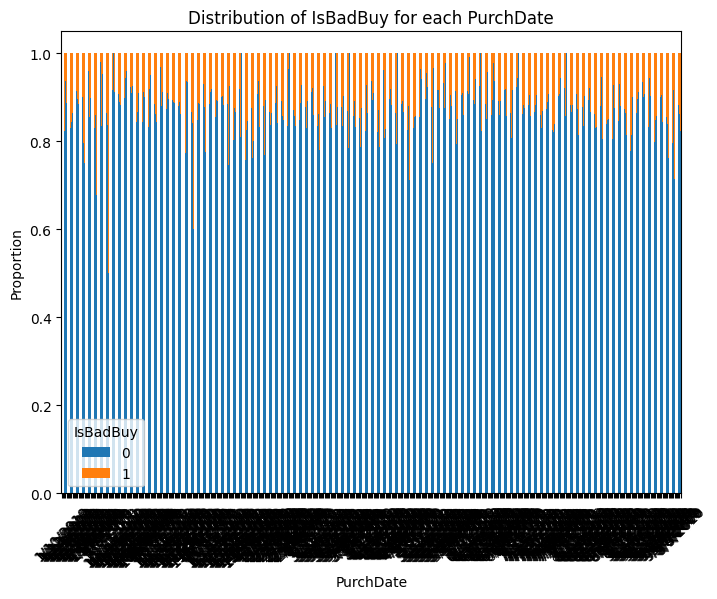

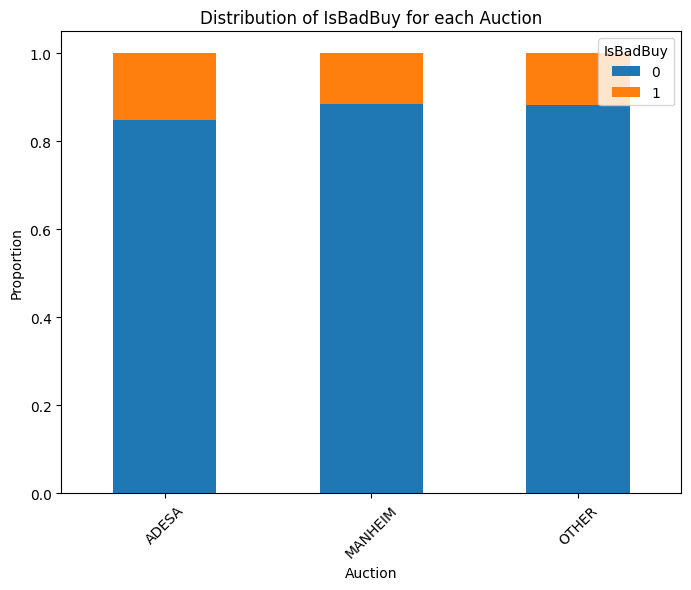

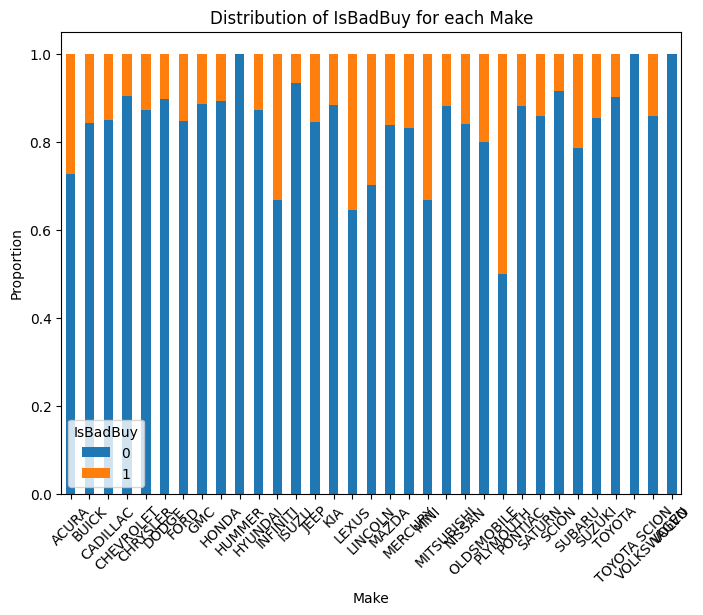

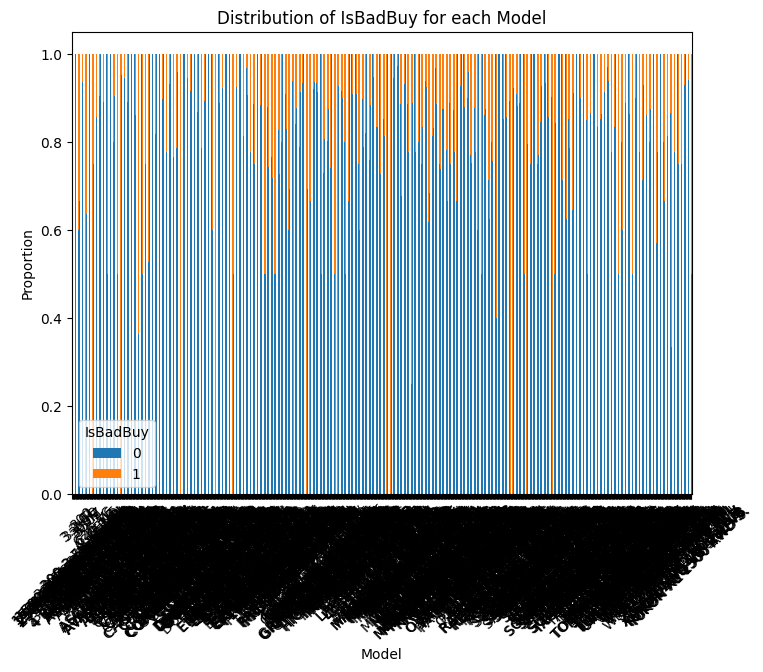

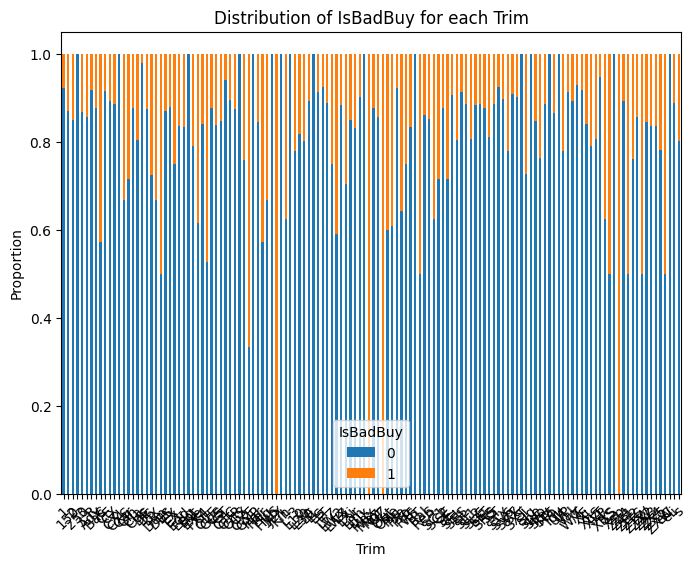

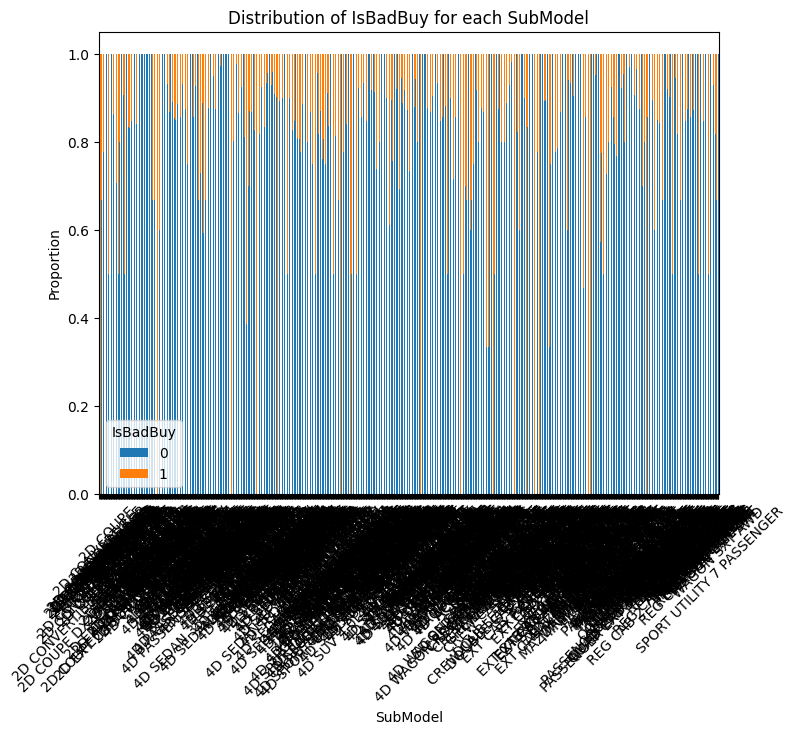

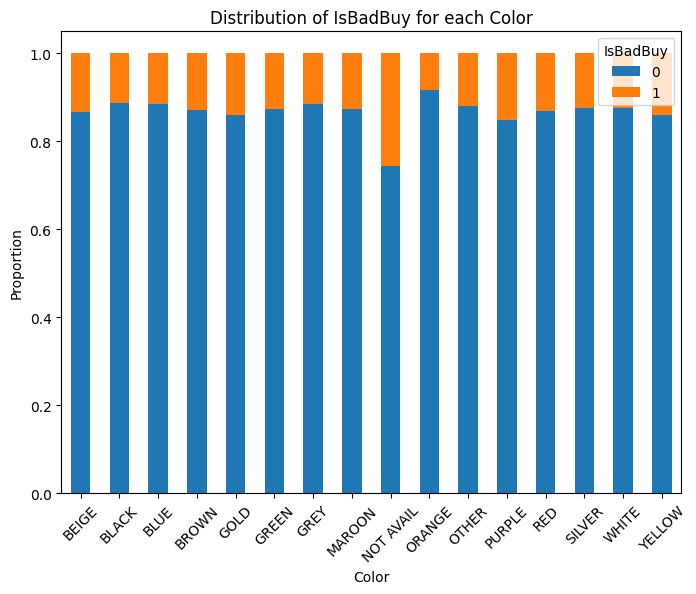

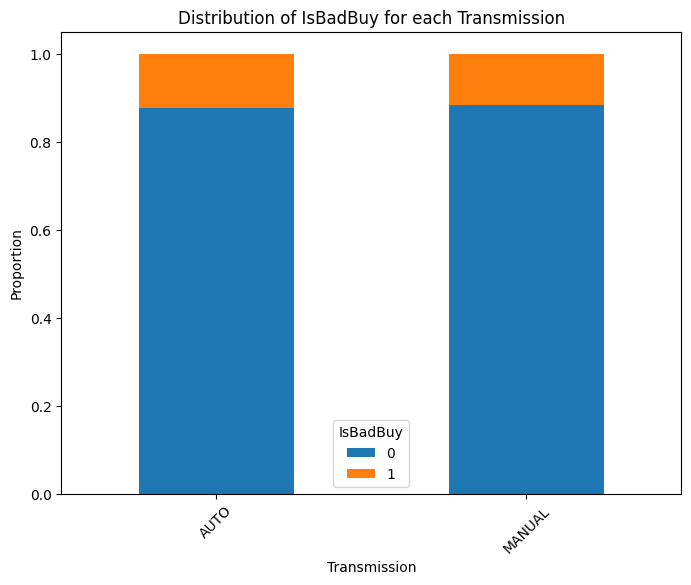

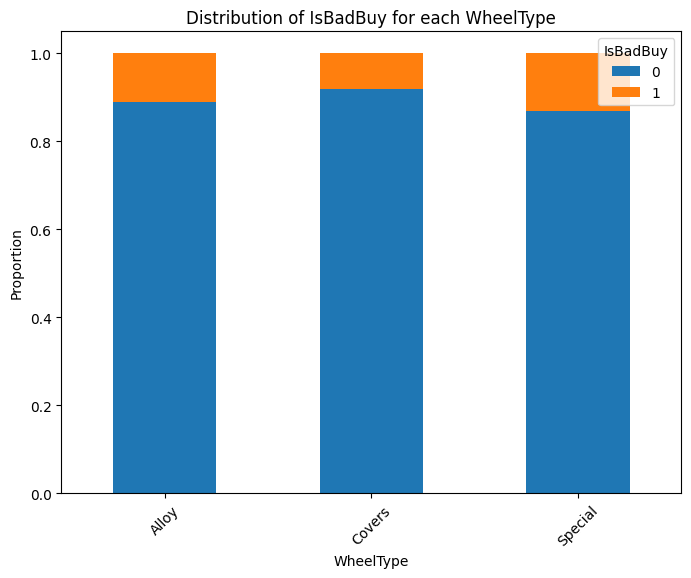

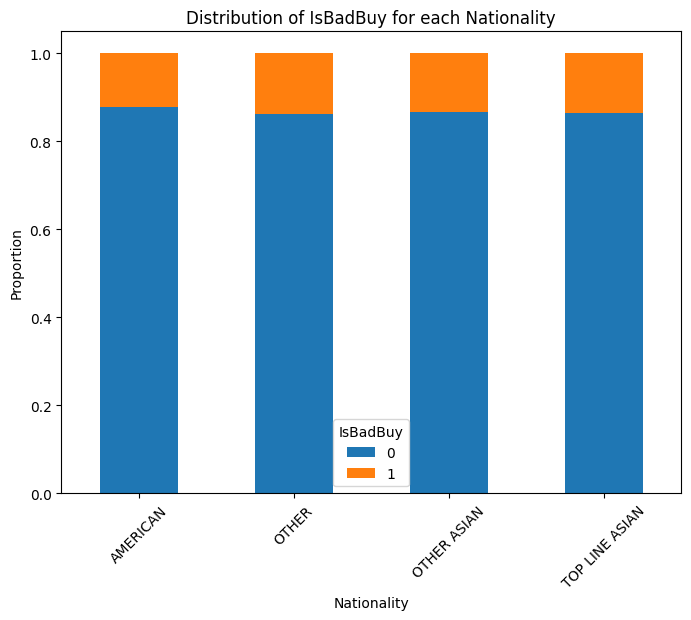

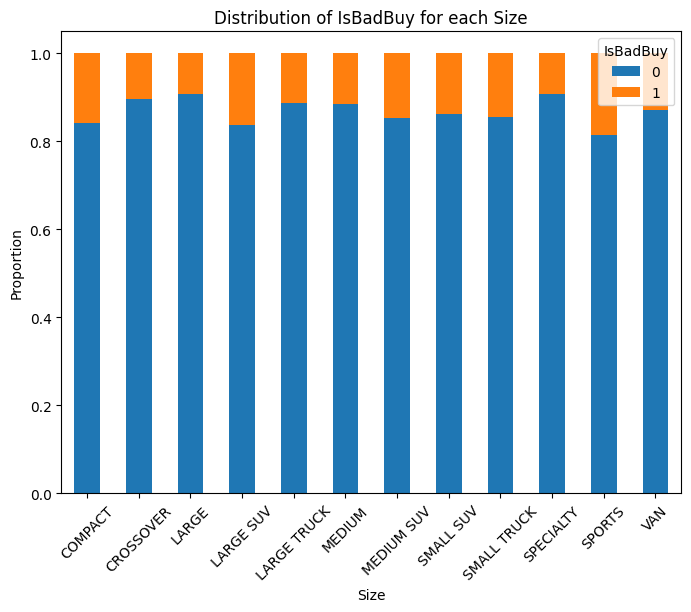

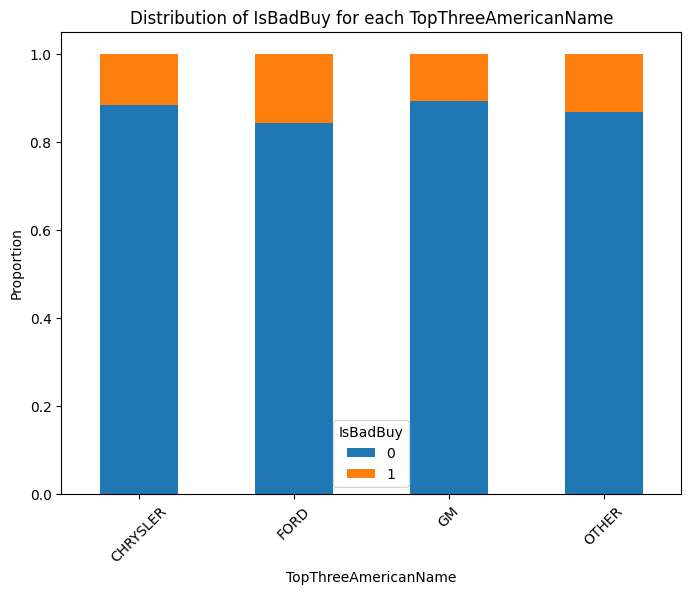

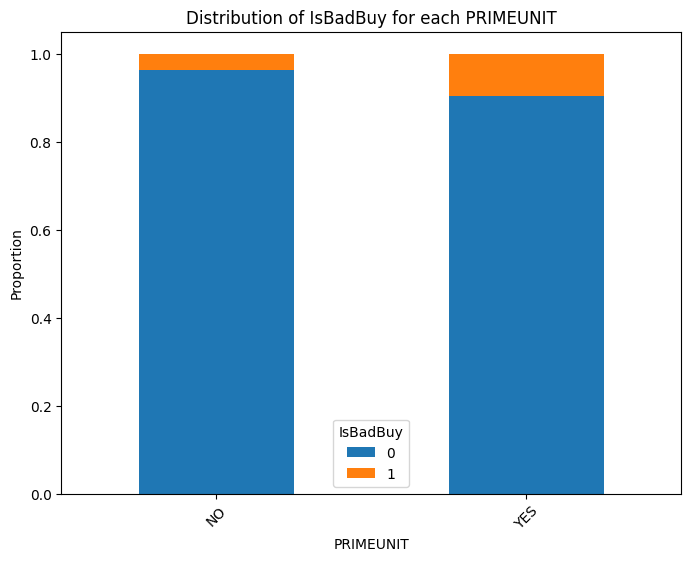

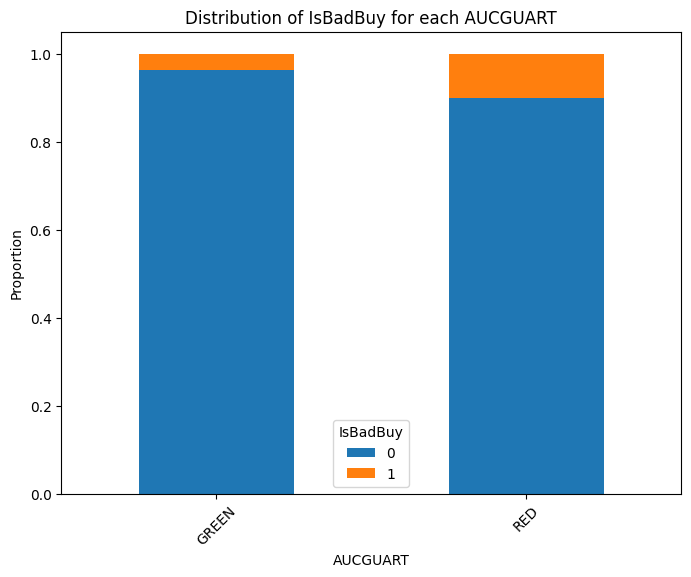

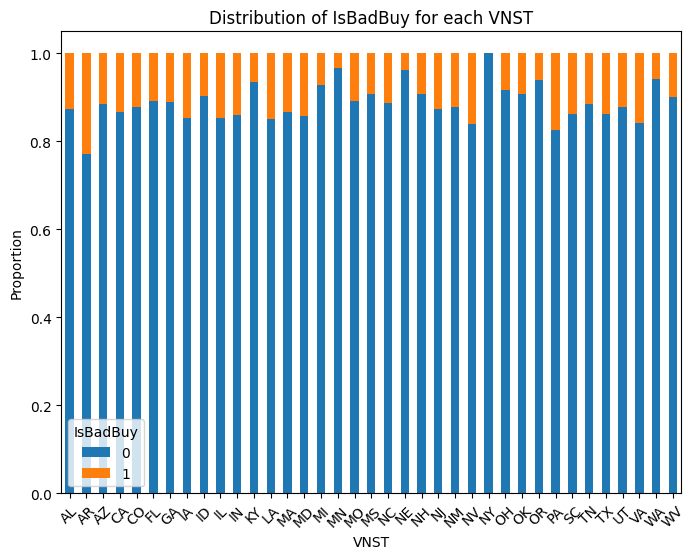

In [7]:
#raspodele vrednosti za sve kategoricke varijable u odnosu na izlaznu
for col in df.select_dtypes(include=['object']).columns:
    ctab = pd.crosstab(index=df[col], columns=df['IsBadBuy'], normalize='index')
    ctab.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(f'Distribution of IsBadBuy for each {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Proportion')
    plt.show()

Možemo primetiti da atributi PurchDate, Model, Trim, SubModel imaju previše jedinstvenih vrednosti i neke od njih ćemo kasnije skroz ukloniti.
Da li je kupljen loš auto ne zavisi toliko od toga gde je održana aukcija(Auction), da li je on automatik ili manuelan(Transmission) niti odakle je proizvođač(Nationality).
Najviše kupljenih automobila koji su bili loša kupovina je poizveo Oldsmobile, zatim Lexus pa onda Mercury i Hyundai.
Za najveći broj kupljenih automobila koji su bili loša kupovina se ne zna boja tj. taj podatak nije zabeležen(ovo sređujemo kasnije) i pretežno veličina tih automobila je compact, large suv i sports.

In [8]:
df['PurchDate'].value_counts()

PurchDate
11/23/2010    384
2/25/2009     379
12/8/2010     372
10/13/2010    359
8/26/2009     359
             ... 
2/20/2010       2
5/25/2009       2
1/10/2010       1
12/4/2010       1
12/24/2010      1
Name: count, Length: 517, dtype: int64

In [9]:
len(df[df['PurchDate'].str.endswith('2010')])

37922

In [10]:
len(df[df['PurchDate'].str.endswith('2009')])

35061

Svi automobili su kupljeni ili 2009. i 20010. godine.

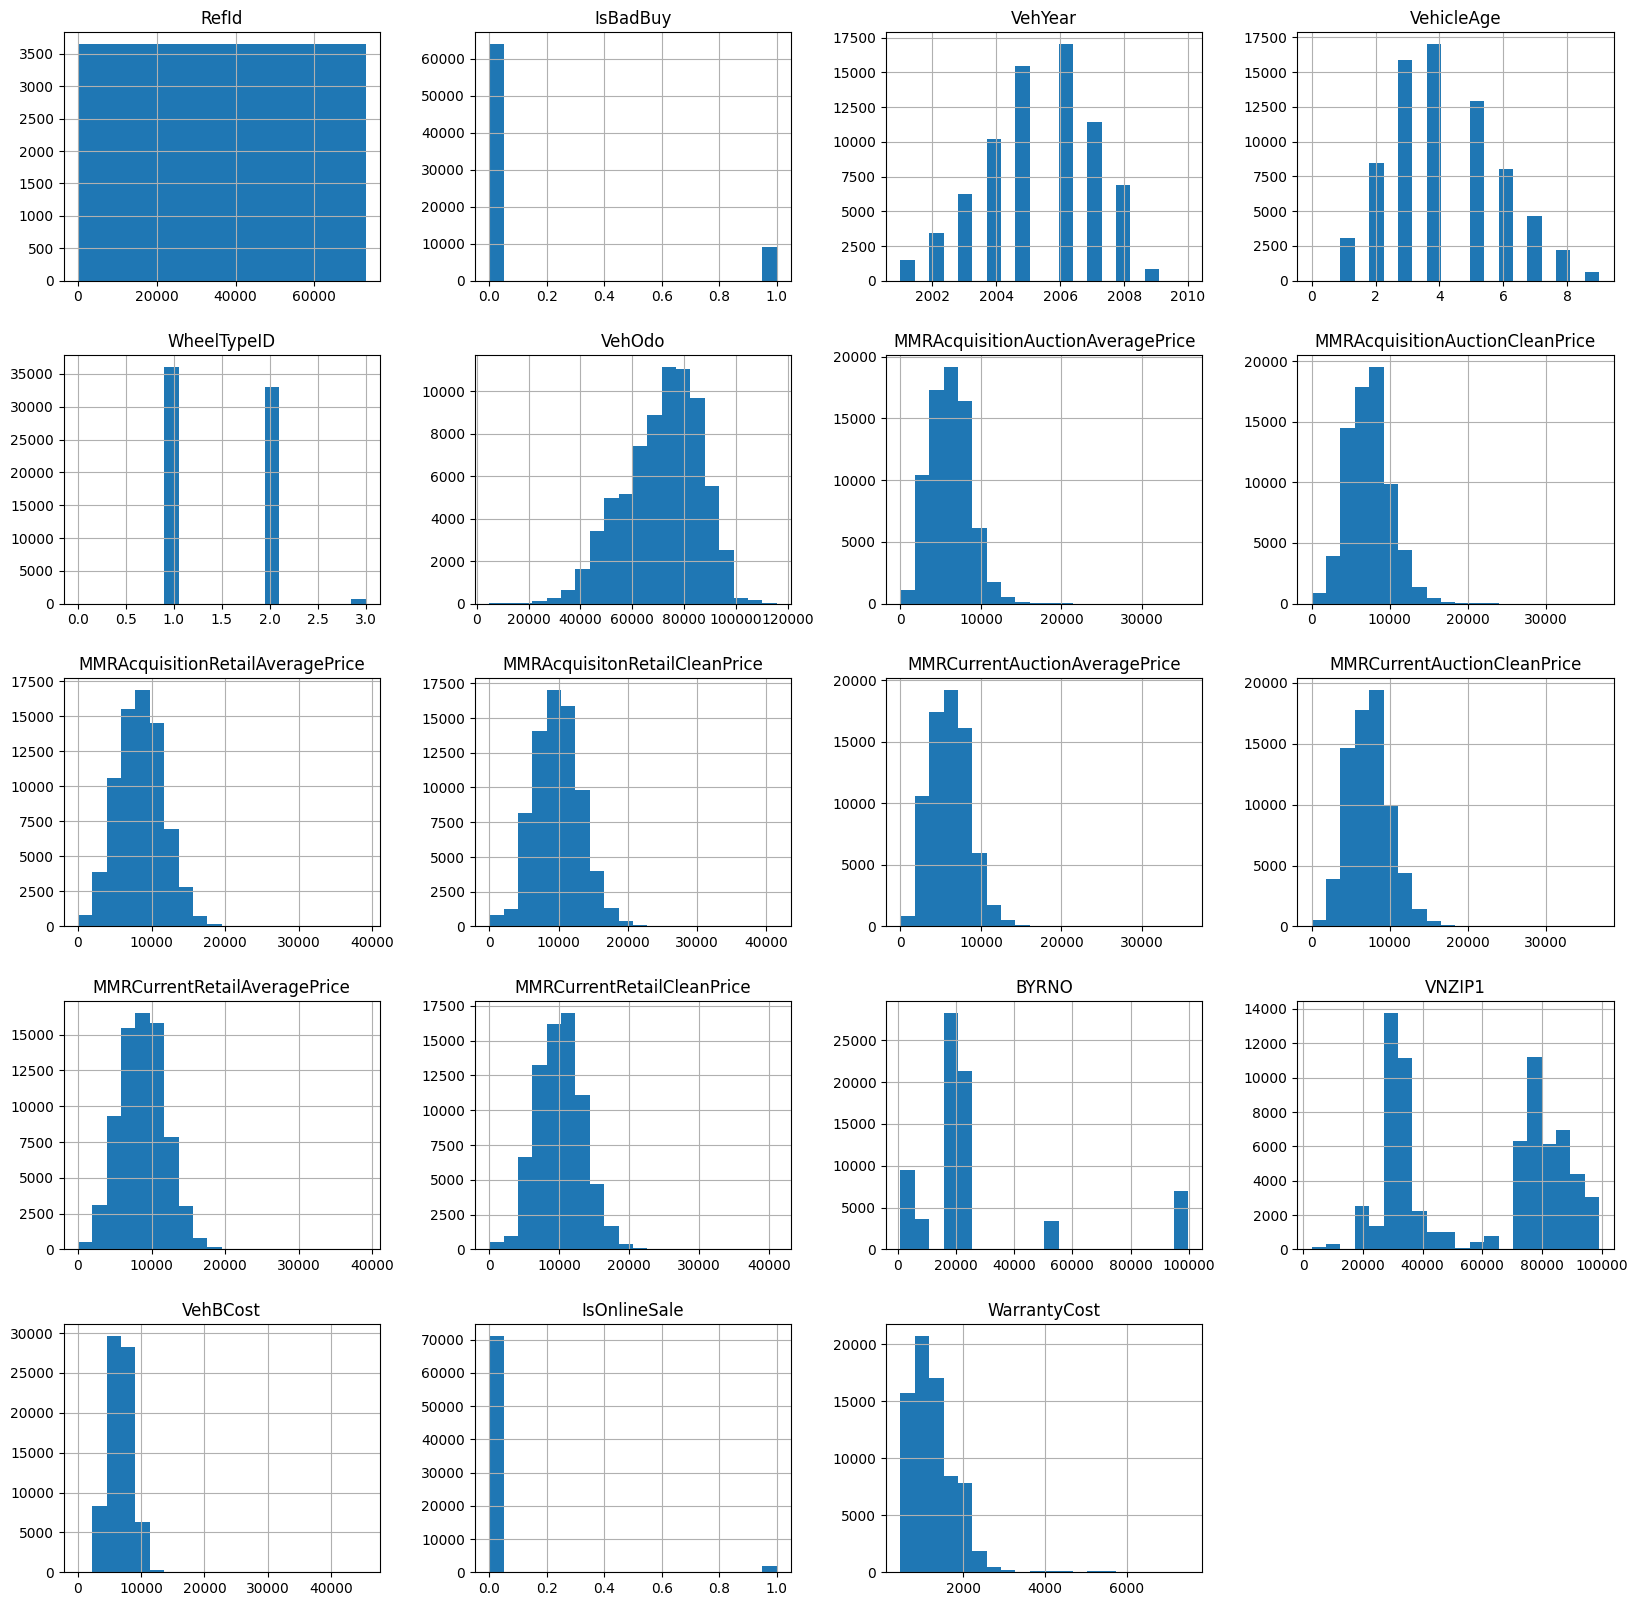

In [11]:
df.hist(bins = 20, figsize=(20,20))
plt.show()

Primećujemo da jako slične raspodele na sličim vrenostima imaju atributi čiji naziv počinje sa MMR. RefId prednostavlja redni broj automobila tako da to u svakom slučaju treba ukluniti. Atribute je kasnije potrebno normalizovati jer se ne nalaze na istom opsegu vrenodosti.

## 2.2. Odnos klasa izlazne varijable

In [12]:
df['IsBadBuy'].value_counts()

IsBadBuy
0    64007
1     8976
Name: count, dtype: int64

In [13]:
df['IsBadBuy'].value_counts(normalize=True)

IsBadBuy
0    0.877012
1    0.122988
Name: proportion, dtype: float64

Nasa ciljna, izlazna varijabla IsBadBuy jeste binarna varijabla koja oznacava to da li je vozilo bilo lose i da li je trebalo izbeci njegovu kupovinu (vrednost 1 - True), odnosno nije bilo lose i nije trebalo izbeci njegovu kupovinu (vrednost 0 - False). <br>

12% automobila u skupu podataka su označeni kao loša kupovina ("kick"), a 88% su dobra kupovina, odakle mozemo zakljuciti da izlazna varijabla nije izbalansirana.

## 2.3. Deskriptivna statistika

In [14]:
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [15]:
df.describe(include=['object','bool'])

,PurchDate,Auction,Make,Model,Trim,SubModel,Color,Transmission,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,VNST
count,72983,72983,72983,72983,70623,72975,72975,72974,69809,72978,72978,72978,3419,3419,72983
unique,517,3,33,1063,134,863,16,2,3,4,12,4,2,2,37
top,11/23/2010,MANHEIM,CHEVROLET,PT CRUISER,Bas,4D SEDAN,SILVER,AUTO,Alloy,AMERICAN,MEDIUM,GM,NO,GREEN,TX
freq,384,41043,17248,2329,13950,15236,14875,70398,36050,61028,30785,25314,3357,3340,13596


## 2.4. Nedostajuće vrednosti

In [16]:
df.isna().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [17]:
#ovo sam odradila zbog provere(zato sto sam videla u test setu da imaju vrednosti u kolonama koje nisu istog tipa kao ta kolona)
#Kreiranje rečnika za čuvanje rezultata
numeric_columns = {}
string_columns = {}

for col in df.columns:
    #provera da li kolona sadrži samo numeričke vrednosti
    numeric_columns[col] = pd.api.types.is_numeric_dtype(df[col])
    
    #provera da li kolona sadrži samo string vrednosti
    string_columns[col] = pd.api.types.is_string_dtype(df[col])

print("Numeričke kolone:")
for col, is_numeric in numeric_columns.items():
    if is_numeric:
        print(f"{col}: {is_numeric}")

print("\nObject kolone:")
for col, is_string in string_columns.items():
    if is_string:
        print(f"{col}: {is_string}")

Numeričke kolone:
RefId: True
IsBadBuy: True
VehYear: True
VehicleAge: True
WheelTypeID: True
VehOdo: True
MMRAcquisitionAuctionAveragePrice: True
MMRAcquisitionAuctionCleanPrice: True
MMRAcquisitionRetailAveragePrice: True
MMRAcquisitonRetailCleanPrice: True
MMRCurrentAuctionAveragePrice: True
MMRCurrentAuctionCleanPrice: True
MMRCurrentRetailAveragePrice: True
MMRCurrentRetailCleanPrice: True
BYRNO: True
VNZIP1: True
VehBCost: True
IsOnlineSale: True
WarrantyCost: True

Object kolone:
PurchDate: True
Auction: True
Make: True
Model: True
VNST: True


# 3. Priprema podataka

“VehYear” and “VehicleAge” imaju isto znacenje

“VNZIP” and “VNST” imaju isto znacenje

“WheelType” and “WheelTypeId” predstavljaju skroz istu stvar

RefId(jer je ID) and PurchDate(datumi su iz 2009. i 2010.) nisu bitne za nase predikcije

BYRNO je takođe identifikacioni broj pa ni on nije pogodan za dalji rad 

In [18]:
kolone_za_brisanje = ['VehYear', 'VNZIP1', 'WheelTypeID', 'RefId', 'PurchDate', 'BYRNO']
df = df.drop(columns=kolone_za_brisanje)

AUCGUART i PRIMEUNIT imaju 69564 NA vrednosti. Obe kolone otklanjamo jer imaju previše NA vrednosti u odnosu na broj instanci skupa podataka(oko 95%). 

In [19]:
df = df.drop(columns=['AUCGUART','PRIMEUNIT'])

In [20]:
df.shape

(72983, 26)

## 3.1. Nedostajuće vrednosti

Nedostajuće vrednosti atributa karakternog tipa smo popunili dominantom vrednošću tj onom vrednošću koja je najfrekventnija za tu određeni atribut.

In [21]:
object_columns = df.select_dtypes(include=['object']).columns
dominant_values = df[object_columns].mode().iloc[0]
df[object_columns]=df[object_columns].fillna(dominant_values)

Sada proveravamo da li numerički atributi imaju normalnu raspodelu (ako imaju normalnu raspodelu NA menjamo srednjom vrednošću, u suprotnom menjamo NA medijanom jer je manje osetljiva na nesimetricne podatke i ekstremne vrednosti). 

In [22]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    stat, p_value = shapiro(df[col])
    print(f'Kolona: {col}')
    print(f'Statistika: {stat}, p-vrednost: {p_value}')
    if p_value >= 0.05:
        print('Distribucija je normalna\n')
    else:
        print('Distribucija nije normalna\n')

Kolona: IsBadBuy
Statistika: 0.3840443896824217, p-vrednost: 5.314303345319292e-159
Distribucija nije normalna

Kolona: VehicleAge
Statistika: 0.9564061470759854, p-vrednost: 1.3991781737111062e-84
Distribucija nije normalna

Kolona: VehOdo
Statistika: 0.9820037057781043, p-vrednost: 5.449002202630142e-65
Distribucija nije normalna

Kolona: MMRAcquisitionAuctionAveragePrice
Statistika: nan, p-vrednost: nan
Distribucija nije normalna

Kolona: MMRAcquisitionAuctionCleanPrice
Statistika: nan, p-vrednost: nan
Distribucija nije normalna

Kolona: MMRAcquisitionRetailAveragePrice
Statistika: nan, p-vrednost: nan
Distribucija nije normalna

Kolona: MMRAcquisitonRetailCleanPrice
Statistika: nan, p-vrednost: nan
Distribucija nije normalna

Kolona: MMRCurrentAuctionAveragePrice
Statistika: nan, p-vrednost: nan
Distribucija nije normalna

Kolona: MMRCurrentAuctionCleanPrice
Statistika: nan, p-vrednost: nan
Distribucija nije normalna

Kolona: MMRCurrentRetailAveragePrice
Statistika: nan, p-vrednost

In [23]:
medianAAP= df["MMRAcquisitionAuctionAveragePrice"].median(skipna=True)
medianACP= df["MMRAcquisitionAuctionCleanPrice"].median(skipna=True)
medianRAP= df["MMRAcquisitionRetailAveragePrice"].median(skipna=True)
medianRCP= df["MMRAcquisitonRetailCleanPrice"].median(skipna=True)
medianCAAP= df["MMRCurrentAuctionAveragePrice"].median(skipna=True)
medianCACP= df["MMRCurrentAuctionCleanPrice"].median(skipna=True)
medianCRAP= df["MMRCurrentRetailAveragePrice"].median(skipna=True)
medianCRCP= df["MMRCurrentRetailCleanPrice"].median(skipna=True)

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].fillna(medianAAP)
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].fillna(medianACP)
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].fillna(medianRAP)
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].fillna(medianRCP)
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].fillna(medianCAAP)
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].fillna(medianCACP)
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].fillna(medianCRAP)
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].fillna(medianCRCP)

In [24]:
df.isna().sum()

IsBadBuy                             0
Auction                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VNST                                 0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost             

Rešili smo se svih NA vrednosti.

## 3.2. Jedinstvene vrednosti

In [25]:
df.select_dtypes(include=['object']).nunique()

Auction                    3
Make                      33
Model                   1063
Trim                     134
SubModel                 863
Color                     16
Transmission               2
WheelType                  3
Nationality                4
Size                      12
TopThreeAmericanName       4
VNST                      37
dtype: int64


Primecujemo da Model, SubModel, Make, Trim, VNST, Color i Size imaju vise razlicitih vrednosti. Izbacicemo atirbute Model (sa preko 1000 kategorija) i atribut Color (koji ne bi trebalo da utice na izlaz). Ovo radimo da ne bismo dosli do predimenzioniranosti podataka pri daljem radu. SubModel cemo sacuvati kako bismo probali da izvucemo neki dodatni atirbut (broj vrata npr). Ostale pomenute atribute cemo za sada zadrzati jer u odnosu na set od preko 70 hiljada instanci, taj broj kategorija nije zabrinjavajuce veliki.

In [26]:
#df = df.drop(columns=['Trim','Make','VNST','Model','Color'])
df = df.drop(columns=['VNST','Model','Color'])

In [27]:
cat_cols = df.select_dtypes(include =['object'])
for cat in cat_cols:
    unique_values = cat_cols[cat].unique()
    print(f'Kolona {cat} ima sledece jedinstvene vrednosti: ')
    print(unique_values)

Kolona Auction ima sledece jedinstvene vrednosti: 
['ADESA' 'OTHER' 'MANHEIM']
Kolona Make ima sledece jedinstvene vrednosti: 
['MAZDA' 'DODGE' 'FORD' 'MITSUBISHI' 'KIA' 'GMC' 'NISSAN' 'CHEVROLET'
 'SATURN' 'CHRYSLER' 'MERCURY' 'HYUNDAI' 'TOYOTA' 'PONTIAC' 'SUZUKI'
 'JEEP' 'HONDA' 'OLDSMOBILE' 'BUICK' 'SCION' 'VOLKSWAGEN' 'ISUZU'
 'LINCOLN' 'MINI' 'SUBARU' 'CADILLAC' 'VOLVO' 'INFINITI' 'PLYMOUTH'
 'LEXUS' 'ACURA' 'TOYOTA SCION' 'HUMMER']
Kolona Trim ima sledece jedinstvene vrednosti: 
['i' 'ST' 'SXT' 'ZX3' 'ES' 'EX' 'SE' 'SEL' 'SLE' 'XL' 'Bas' 'LS' 'SS'
 'SLT' '150' 'Spo' 'LX' 'GLS' 'CE' 'GT' 'Lar' '2' 'Adv' 'SR5' 'GXP' 'Tou'
 'XLT' 'LT' 'SES' 'XLS' 'GL' 'LE' '1' 'L20' 'Lim' 's' 'Edd' '3' 'Edg'
 'ZTW' 'ZX4' 'STX' 'CX' 'Nor' 'GS' 'XE' 'CXL' 'Ren' 'LTZ' 'ZTS' 'S' 'GTC'
 'GTP' 'Cla' 'Spy' 'LXi' 'SE-' 'Exe' 'Pre' 'SL2' 'GXE' 'SL1' 'Cus' 'GLE'
 'DE' 'Z71' 'Si' 'X' 'SX' 'XR' 'SVT' 'GTS' 'LW3' 'SV6' 'Val' 'Car' 'eL'
 'DX' 'Spe' 'W/T' 'LW2' 'Pro' 'SL' 'L30' 'RT' 'CXS' 'VP' 'Cin' 'Max' 'Ral'
 '

In [28]:
df['Transmission'].value_counts()

Transmission
AUTO      70407
MANUAL     2576
Name: count, dtype: int64

In [29]:
df['WheelType'].value_counts()

WheelType
Alloy      39224
Covers     33004
Special      755
Name: count, dtype: int64

Special nije definisana vrednost u dokumentaciji pa je pretvaramo u dominantnu kategoriju, a to je Alloy

In [30]:
df['WheelType'] = df['WheelType'].replace('Special', 'Alloy')

In [31]:
df.columns

Index(['IsBadBuy', 'Auction', 'VehicleAge', 'Make', 'Trim', 'SubModel',
       'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost', 'IsOnlineSale',
       'WarrantyCost'],
      dtype='object')

## 3.3. Korelacija

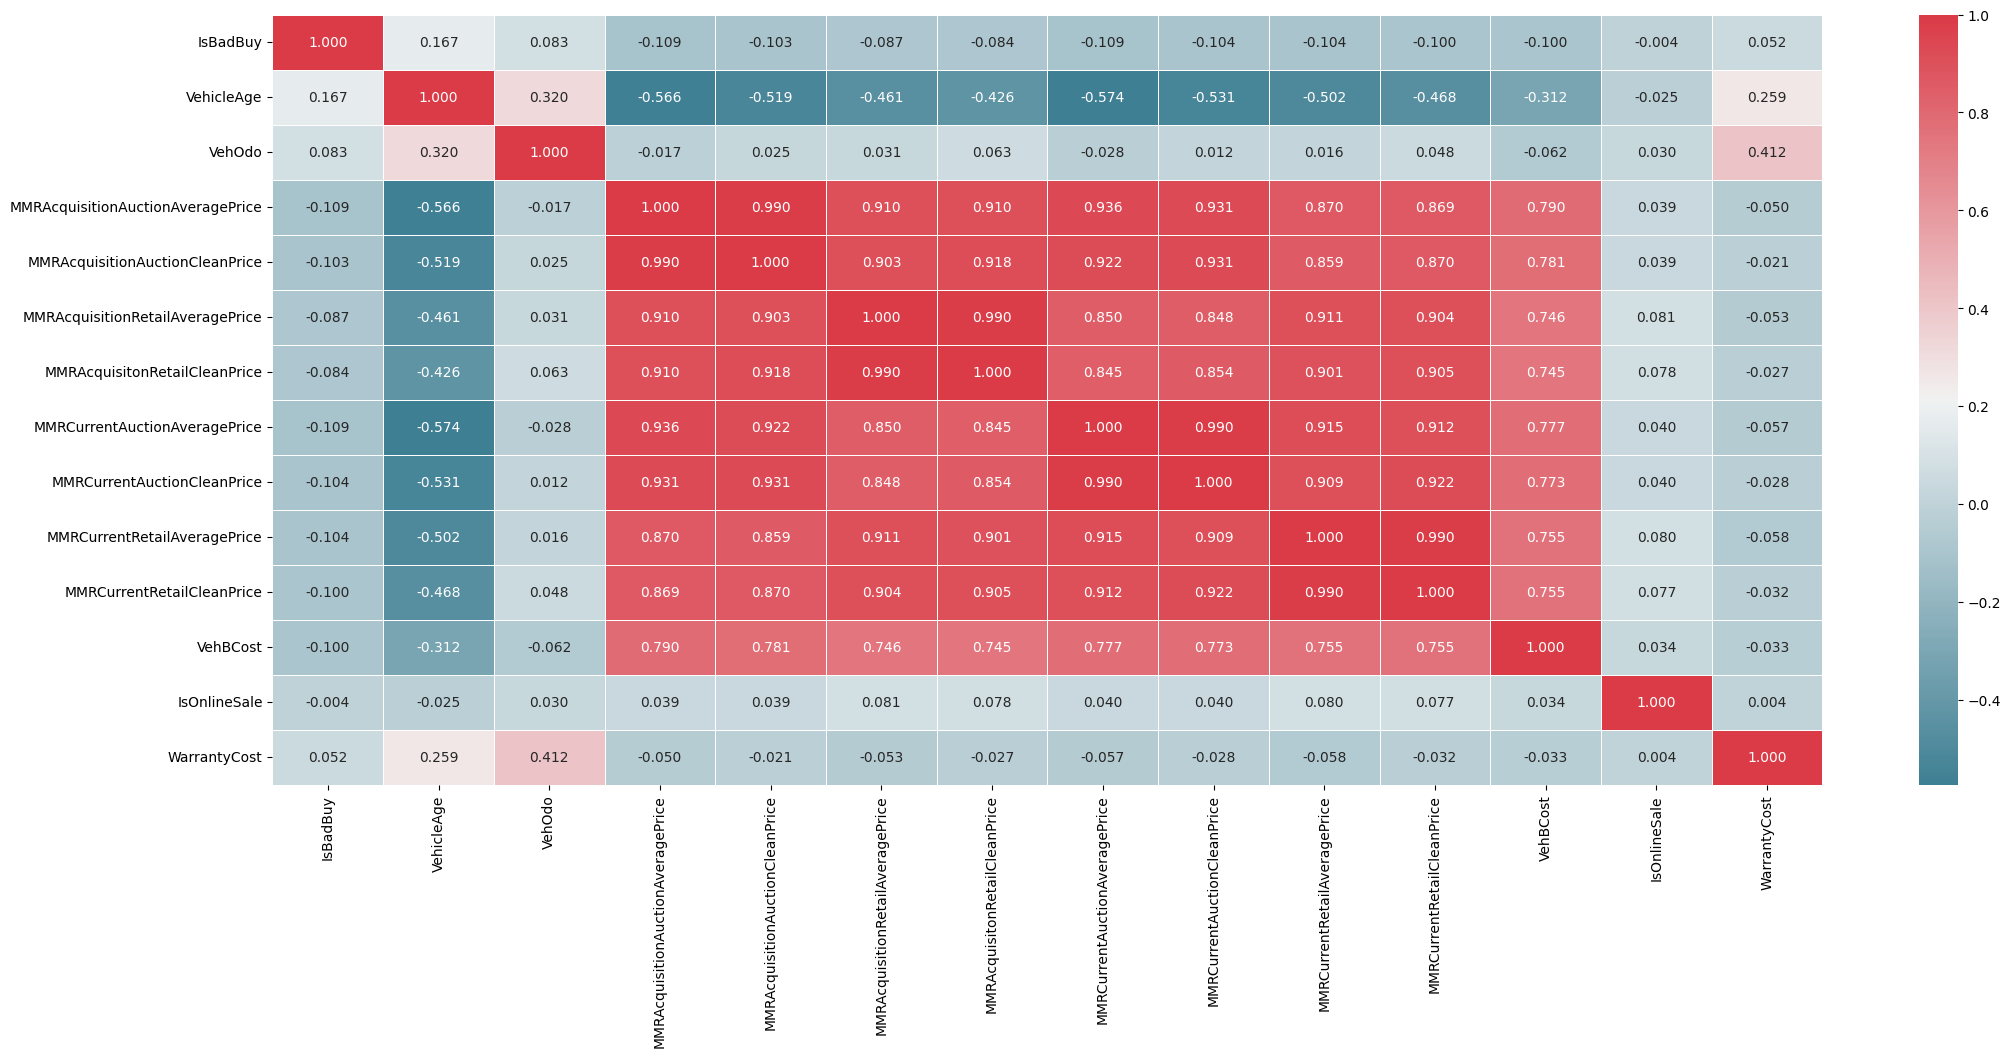

In [32]:
numerical_features = df.select_dtypes(include = ['float64', 'int64'])
plt.figure(figsize=(25,10))
sns.heatmap(numerical_features.corr(),cmap = sns.diverging_palette(220, 10, as_cmap = True),annot=True, linewidths=.5, fmt= '.3f');
plt.show();

Sve kolone čiji naziv počinje sa MMR imaju jako veliku korelaciju. Pokušaćemo ovo da sredimo dodavanjem novih atributa.

## 3.4. Izvođenje novih atributa

In [33]:
df['AcquisitionAuctionRatio'] = df['MMRAcquisitionAuctionAveragePrice'] / df['MMRAcquisitionAuctionCleanPrice']
df['AcquisitionRetailRatio'] = df['MMRAcquisitionRetailAveragePrice'] / df['MMRAcquisitonRetailCleanPrice']
df['CurrentAuctionRatio'] = df['MMRCurrentAuctionAveragePrice'] / df['MMRCurrentAuctionCleanPrice']
df['CurrentRetailRatio'] = df['MMRCurrentRetailAveragePrice'] / df['MMRCurrentRetailCleanPrice']

AcquisitionAuctionRatio - Ova kolona predstavlja odnos prosečne cene na aukciji u trenutku akvizicije u odnosu na čistu cenu na aukciji u trenutku akvizicije. Vrednost bliža 1 ukazuje na malu razliku između prosečne i čiste cene, dok vrednost manja od 1 ukazuje da je prosečna cena znatno niža od čiste cene, što može sugerisati da se vozila u proseku prodaju po nižim cenama u odnosu na njihovo čisto stanje.

AcquisitionRetailRatio - Ova kolona predstavlja odnos prosečne maloprodajne cene u trenutku akvizicije u odnosu na čistu maloprodajnu cenu u trenutku akvizicije. Slično kao kod aukcijskog odnosa, vrednost bliža 1 ukazuje na malu razliku između prosečne i čiste cene, dok vrednost manja od 1 ukazuje da je prosečna cena znatno niža od čiste cene, što može sugerisati da se vozila u proseku prodaju po nižim cenama u odnosu na njihovo čisto stanje na maloprodajnom tržištu.

CurrentAuctionRatio - Ova kolona predstavlja odnos trenutne prosečne aukcijske cene u odnosu na trenutnu čistu aukcijsku cenu. Ovaj odnos može pružiti uvide u to koliko se prosečne cene na aukcijama razlikuju od čistih cena. Vrednost bliža 1 ukazuje na malu razliku između prosečne i čiste cene, dok vrednost manja od 1 ukazuje na značajnije razlike.

CurrentRetailRatio - Ova kolona predstavlja odnos trenutne prosečne maloprodajne cene u odnosu na trenutnu čistu maloprodajnu cenu. Slično kao kod aukcijskog odnosa, ovaj odnos može pružiti uvide u to koliko se prosečne cene na maloprodajnom tržištu razlikuju od čistih cena. Vrednost bliža 1 ukazuje na malu razliku između prosečne i čiste cene, dok vrednost manja od 1 ukazuje na značajnije razlike.

In [34]:
unique_submodels = df['SubModel'].unique()

In [35]:
unique_submodels

array(['4D SEDAN I', 'QUAD CAB 4.7L SLT', '4D SEDAN SXT FFV', '4D SEDAN',
       '2D COUPE ZX3', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE',
       '4D SEDAN SEL', 'REG CAB 4.3L', 'REG CAB 4.2L XL', 'MINIVAN 3.3L',
       'MINIVAN 3.8L', '2D COUPE', '4D SUV 4.2L', '4D CUV 2.2L',
       '4D UTILITY 4.2L SLE', '2D COUPE SS', 'PASSENGER 3.4L',
       '4D SUV 2.2L LS', '4D SEDAN LS PREMIUM', '4D SUV 5.7L SLT',
       'MINIVAN 3.8L SXT', '4D UTILITY 5.3L FFV LS', '2D SUV 4.0L SPORT',
       '4D SUV-PICKUP 5.3L', 'PASSENGER 3.8L LX', 'PASSENGER 3.9L LX',
       '4D WAGON SXT', '4D SEDAN 1.8', '4D SPORT TOURER',
       '4D SEDAN LS 3.5L FFV', 'QUAD CAB 5.7L', '4D SPORT UTILITY',
       '4D SEDAN CE', '4D SEDAN GT', 'QUAD CAB 4.7L', '4D SEDAN LEVEL 2',
       '4D SUV 4.7L', '4D SUV 4.7L ADVENTURER', '4D SEDAN GLS',
       '4D SPORT UTILITY SPORT EDITION', '4D SEDAN GXP', '4D WAGON SPORT',
       '4D SUV', 'QUAD CAB 3.7L ST', '4D SUV 5.3L', '4D SEDAN LS',
       '4D SUV 4.6L XLT', '4D SUV 4.7L

In [36]:
df = df.drop(columns=['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
             'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailAveragePrice', 
             'MMRCurrentRetailCleanPrice', 'MMRCurrentAuctionCleanPrice'])

Odlucile smo da iskoristimo i atirbut 'SubModel' da napravimo nov atirbut Wheel_Drive sa vrednostima "2D" ili "4D" (vozilo sa 2 ili 4 tocka).

In [37]:
df['NumberOfDoors'] = np.where(df['SubModel'].str.contains('2D'), 2, np.where(df['SubModel'].str.contains('4D'), 4, np.nan))

In [38]:
df['NumberOfDoors'].isna().sum()

9791

In [39]:
#Posto se pojavilo dosta NA vrednosti ipak cemo da izbrisemo ovaj dodatni atribut, ne poboljsava model ukoliko dodelimo npr. modus svim ovim nedostajucim.

In [40]:
df = df.drop(columns=['NumberOfDoors','SubModel'])

In [41]:
df.columns

Index(['IsBadBuy', 'Auction', 'VehicleAge', 'Make', 'Trim', 'Transmission',
       'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'AcquisitionAuctionRatio',
       'AcquisitionRetailRatio', 'CurrentAuctionRatio', 'CurrentRetailRatio'],
      dtype='object')

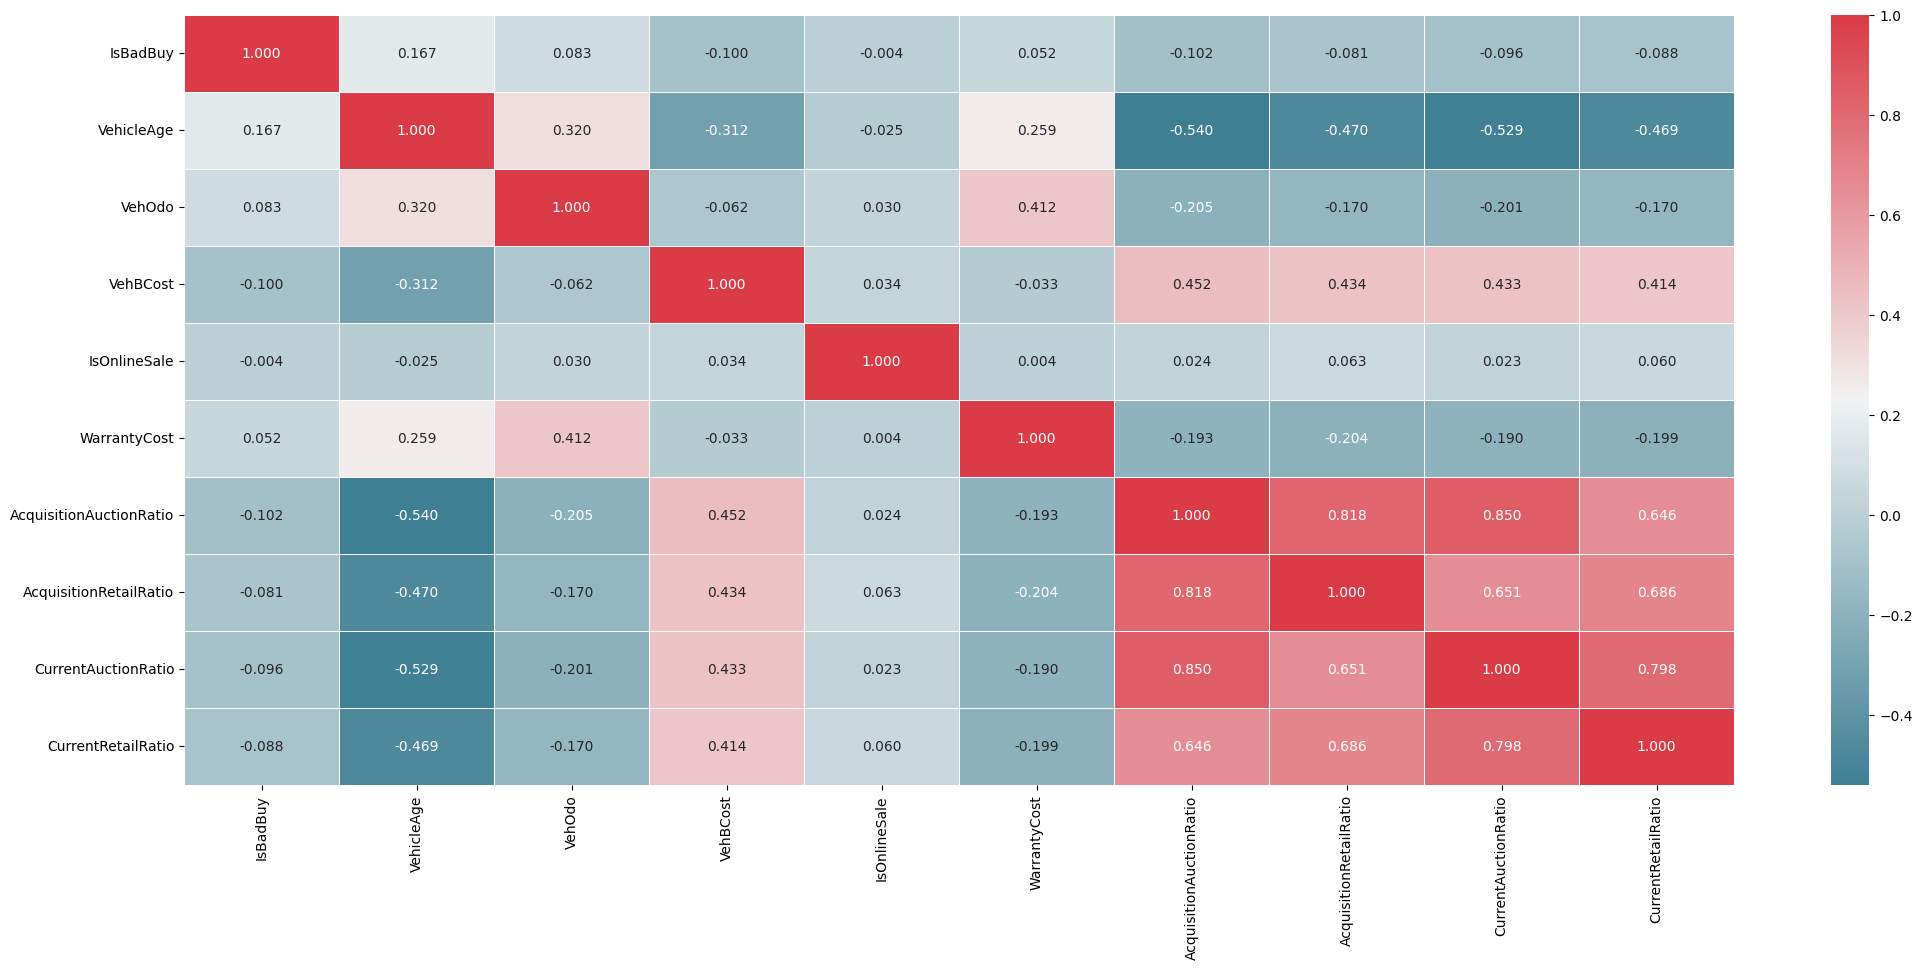

In [42]:
numerical_features = df.select_dtypes(include = ['float64', 'int64'])
plt.figure(figsize=(25,10))
sns.heatmap(numerical_features.corr(),cmap = sns.diverging_palette(220, 10, as_cmap = True),annot=True, linewidths=.5, fmt= '.3f');
plt.show();

Kao što možemo da primetimo značajno smo smanjili korelaciju između atributa.

Proveravamo da li su se opet javile NA vrednosti prilikom izračunavanja racia.

In [43]:
df.isna().sum()

IsBadBuy                     0
Auction                      0
VehicleAge                   0
Make                         0
Trim                         0
Transmission                 0
WheelType                    0
VehOdo                       0
Nationality                  0
Size                         0
TopThreeAmericanName         0
VehBCost                     0
IsOnlineSale                 0
WarrantyCost                 0
AcquisitionAuctionRatio    697
AcquisitionRetailRatio     828
CurrentAuctionRatio        378
CurrentRetailRatio         504
dtype: int64

In [44]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    stat, p_value = shapiro(df[col])
    print(f'Kolona: {col}')
    print(f'Statistika: {stat}, p-vrednost: {p_value}')
    if p_value >= 0.05:
        print('Distribucija je normalna\n')
    else:
        print('Distribucija nije normalna\n')

Kolona: IsBadBuy
Statistika: 0.3840443896824217, p-vrednost: 5.314303345319292e-159
Distribucija nije normalna

Kolona: VehicleAge
Statistika: 0.9564061470759854, p-vrednost: 1.3991781737111062e-84
Distribucija nije normalna

Kolona: VehOdo
Statistika: 0.9820037057781043, p-vrednost: 5.449002202630142e-65
Distribucija nije normalna

Kolona: VehBCost
Statistika: 0.9751566622207993, p-vrednost: 7.992793034406053e-72
Distribucija nije normalna

Kolona: IsOnlineSale
Statistika: 0.14123049848186442, p-vrednost: 5.184809452118642e-170
Distribucija nije normalna

Kolona: WarrantyCost
Statistika: 0.8637263112129345, p-vrednost: 1.0428665867036319e-113
Distribucija nije normalna

Kolona: AcquisitionAuctionRatio
Statistika: nan, p-vrednost: nan
Distribucija nije normalna

Kolona: AcquisitionRetailRatio
Statistika: nan, p-vrednost: nan
Distribucija nije normalna

Kolona: CurrentAuctionRatio
Statistika: nan, p-vrednost: nan
Distribucija nije normalna

Kolona: CurrentRetailRatio
Statistika: nan, p-

In [45]:
medianAAR= df["AcquisitionAuctionRatio"].median(skipna=True)
medianARR= df["AcquisitionRetailRatio"].median(skipna=True)
medianCAR= df["CurrentAuctionRatio"].median(skipna=True)
medianCRR= df["CurrentRetailRatio"].median(skipna=True)

df['AcquisitionAuctionRatio'] = df['AcquisitionAuctionRatio'].fillna(medianAAR)
df['AcquisitionRetailRatio'] = df['AcquisitionRetailRatio'].fillna(medianARR)
df['CurrentAuctionRatio'] = df['CurrentAuctionRatio'].fillna(medianCAR)
df['CurrentRetailRatio'] = df['CurrentRetailRatio'].fillna(medianCRR)

In [46]:
df.isna().sum()

IsBadBuy                   0
Auction                    0
VehicleAge                 0
Make                       0
Trim                       0
Transmission               0
WheelType                  0
VehOdo                     0
Nationality                0
Size                       0
TopThreeAmericanName       0
VehBCost                   0
IsOnlineSale               0
WarrantyCost               0
AcquisitionAuctionRatio    0
AcquisitionRetailRatio     0
CurrentAuctionRatio        0
CurrentRetailRatio         0
dtype: int64

## 3.5. Autlajeri

Za prepoznavanje autlajera koristićemo IQR, a za njihovo uklanjanje koristićemo capping(da sačuvamo podatke).

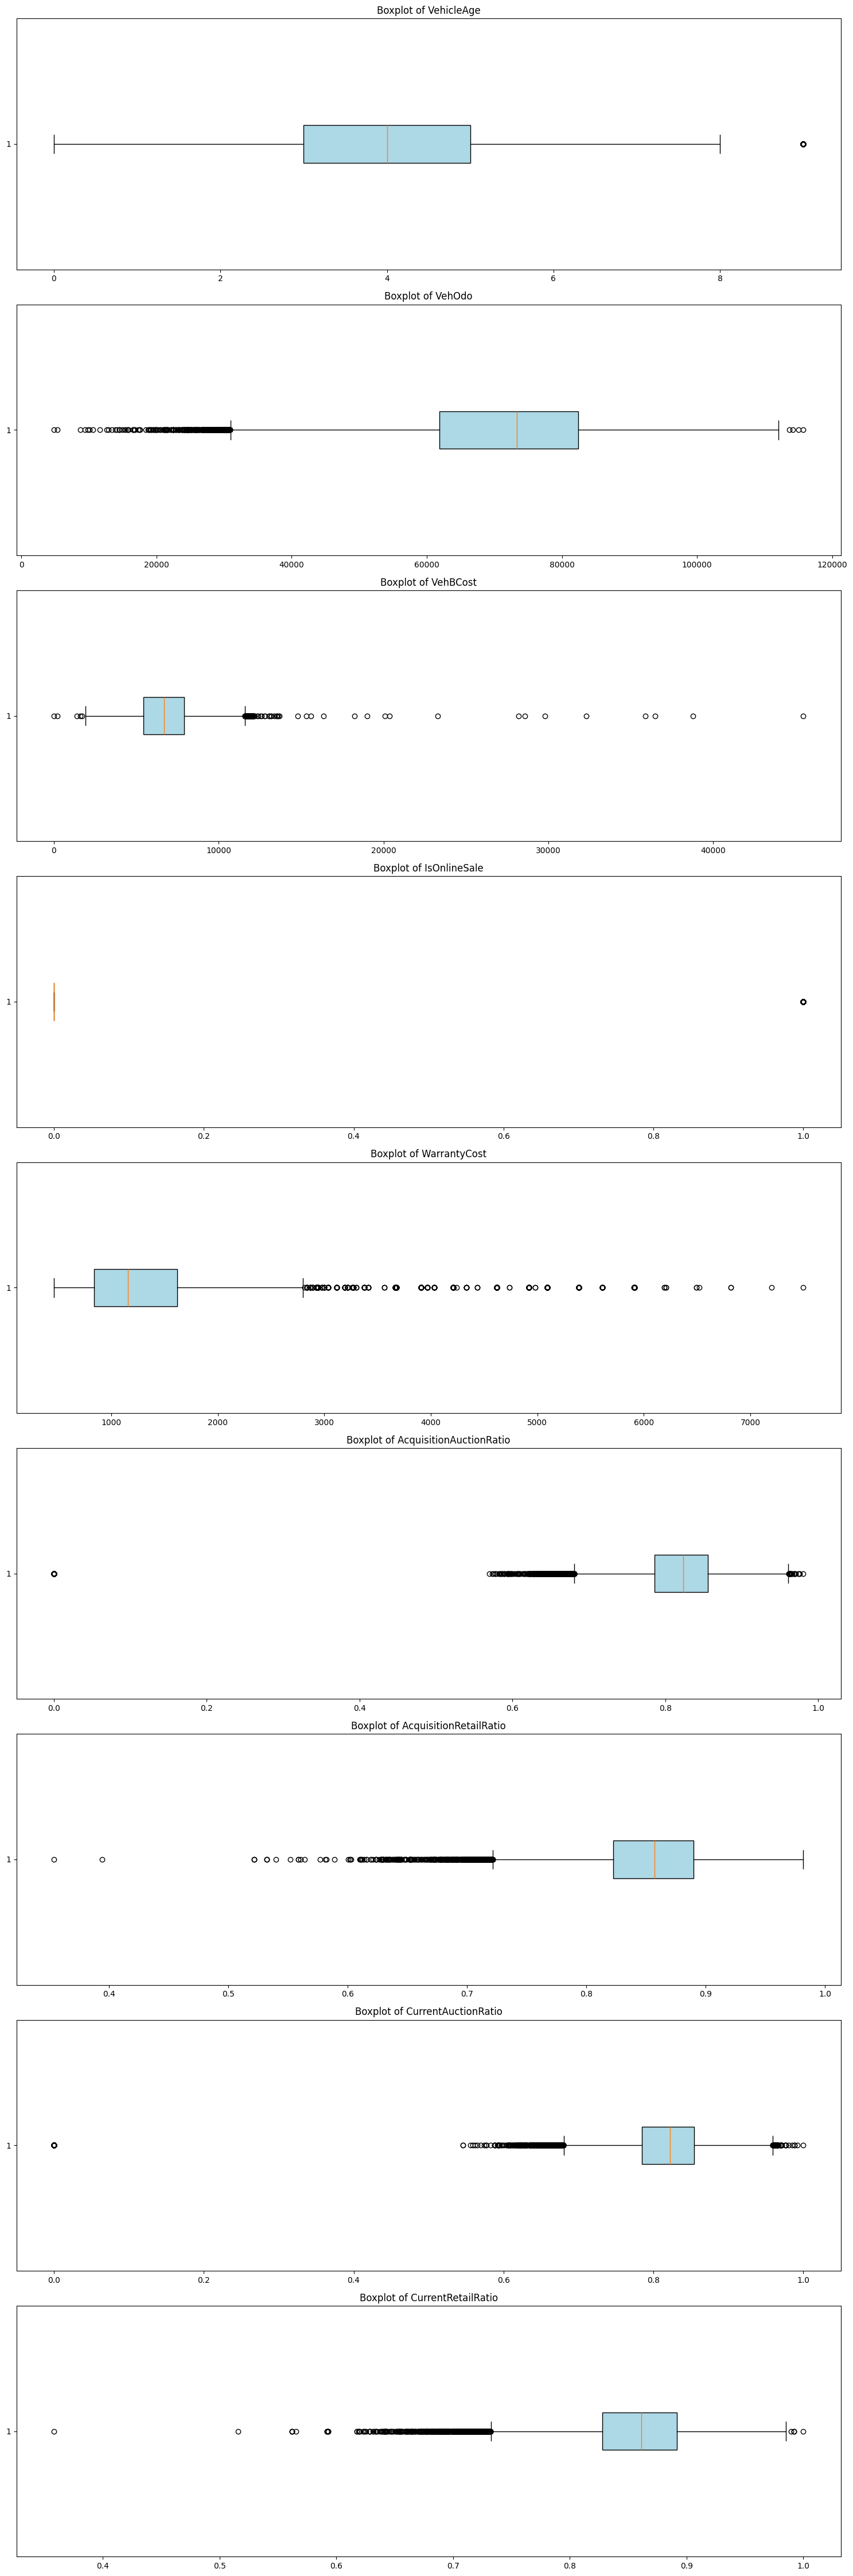

In [47]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('IsBadBuy')
plt.figure(figsize=(15, len(numeric_columns) * 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [48]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

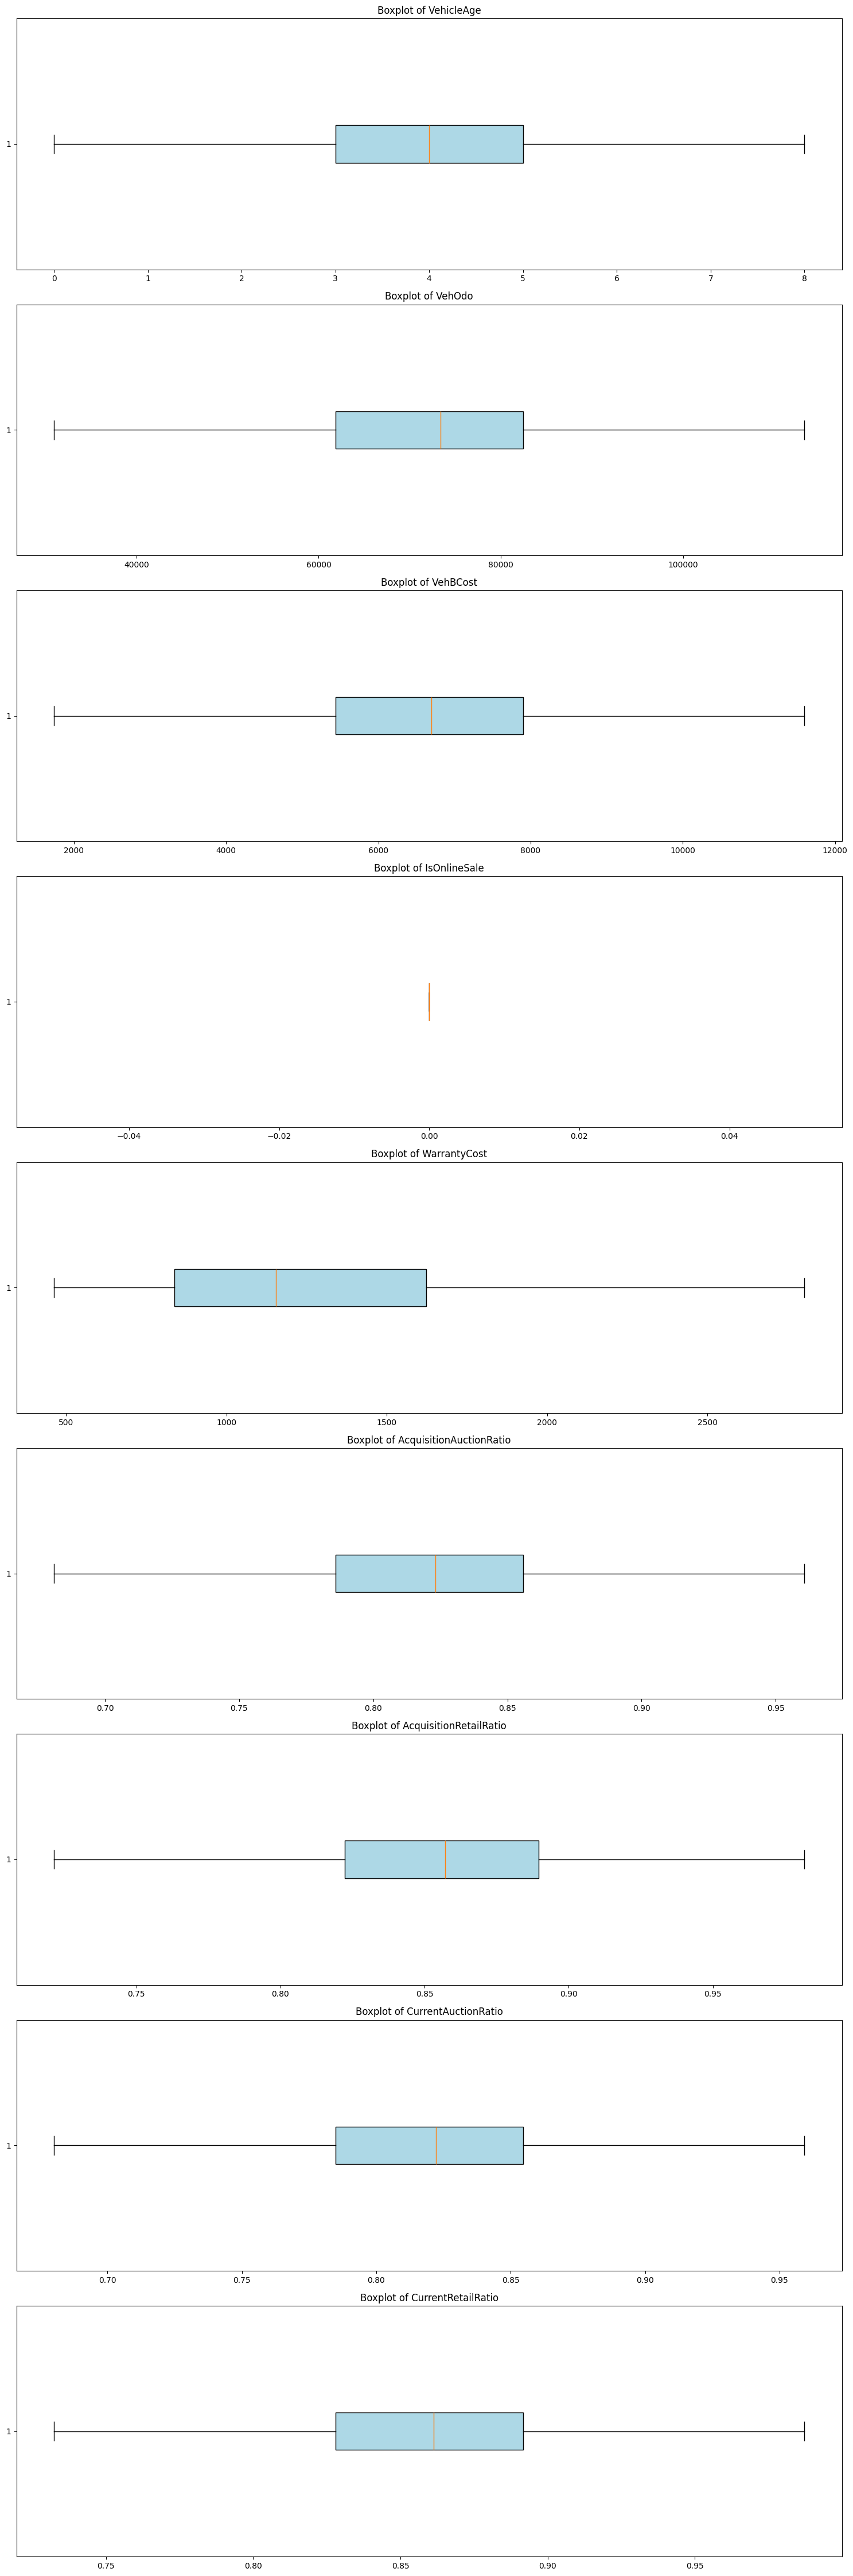

In [49]:
plt.figure(figsize=(15, len(numeric_columns) * 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [50]:
df['IsOnlineSale'].value_counts()

IsOnlineSale
0.0    72983
Name: count, dtype: int64

U atributu IsOnlineSale su ostale samo vrednosti 0, tako da ovaj atribut uklanjamo jer neće imati nikakav uticaj na naše modele

In [51]:
df.drop(columns=['IsOnlineSale'], inplace=True)

In [52]:
df.dtypes

IsBadBuy                     int64
Auction                     object
VehicleAge                 float64
Make                        object
Trim                        object
Transmission                object
WheelType                   object
VehOdo                     float64
Nationality                 object
Size                        object
TopThreeAmericanName        object
VehBCost                   float64
WarrantyCost               float64
AcquisitionAuctionRatio    float64
AcquisitionRetailRatio     float64
CurrentAuctionRatio        float64
CurrentRetailRatio         float64
dtype: object

## 3.6. Transformacija podataka

Neki algoritmi masinskog ucenja rade samo sa numerickim podacima, a neki koji mogu da rade i sa kategorickim ipak pokazuju bolje perfomanse u radu sa numerickim.

In [53]:
num_cols = df.select_dtypes(include =['int64', 'float64'])
cat_cols = df.select_dtypes(include =['object'])

In [54]:
for cat in cat_cols:
    unique_values = cat_cols[cat].unique()
    print(f'Kolona {cat} ima sledece jedinstvene vrednosti: ')
    print(unique_values)

Kolona Auction ima sledece jedinstvene vrednosti: 
['ADESA' 'OTHER' 'MANHEIM']
Kolona Make ima sledece jedinstvene vrednosti: 
['MAZDA' 'DODGE' 'FORD' 'MITSUBISHI' 'KIA' 'GMC' 'NISSAN' 'CHEVROLET'
 'SATURN' 'CHRYSLER' 'MERCURY' 'HYUNDAI' 'TOYOTA' 'PONTIAC' 'SUZUKI'
 'JEEP' 'HONDA' 'OLDSMOBILE' 'BUICK' 'SCION' 'VOLKSWAGEN' 'ISUZU'
 'LINCOLN' 'MINI' 'SUBARU' 'CADILLAC' 'VOLVO' 'INFINITI' 'PLYMOUTH'
 'LEXUS' 'ACURA' 'TOYOTA SCION' 'HUMMER']
Kolona Trim ima sledece jedinstvene vrednosti: 
['i' 'ST' 'SXT' 'ZX3' 'ES' 'EX' 'SE' 'SEL' 'SLE' 'XL' 'Bas' 'LS' 'SS'
 'SLT' '150' 'Spo' 'LX' 'GLS' 'CE' 'GT' 'Lar' '2' 'Adv' 'SR5' 'GXP' 'Tou'
 'XLT' 'LT' 'SES' 'XLS' 'GL' 'LE' '1' 'L20' 'Lim' 's' 'Edd' '3' 'Edg'
 'ZTW' 'ZX4' 'STX' 'CX' 'Nor' 'GS' 'XE' 'CXL' 'Ren' 'LTZ' 'ZTS' 'S' 'GTC'
 'GTP' 'Cla' 'Spy' 'LXi' 'SE-' 'Exe' 'Pre' 'SL2' 'GXE' 'SL1' 'Cus' 'GLE'
 'DE' 'Z71' 'Si' 'X' 'SX' 'XR' 'SVT' 'GTS' 'LW3' 'SV6' 'Val' 'Car' 'eL'
 'DX' 'Spe' 'W/T' 'LW2' 'Pro' 'SL' 'L30' 'RT' 'CXS' 'VP' 'Cin' 'Max' 'Ral'
 '

In [55]:
df.head()

,IsBadBuy,Auction,VehicleAge,Make,Trim,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VehBCost,WarrantyCost,AcquisitionAuctionRatio,AcquisitionRetailRatio,CurrentAuctionRatio,CurrentRetailRatio
0,0,ADESA,3.0,MAZDA,i,AUTO,Alloy,89046.0,OTHER ASIAN,MEDIUM,OTHER,7100.0,1113.0,0.829688,0.855588,0.871258,0.934564
1,0,ADESA,5.0,DODGE,ST,AUTO,Alloy,93593.0,AMERICAN,LARGE TRUCK,CHRYSLER,7600.0,1053.0,0.817607,0.866767,0.808501,0.889219
2,0,ADESA,4.0,DODGE,SXT,AUTO,Covers,73807.0,AMERICAN,MEDIUM,CHRYSLER,4900.0,1389.0,0.680987,0.820977,0.726111,0.821191
3,0,ADESA,5.0,DODGE,SXT,AUTO,Alloy,65617.0,AMERICAN,COMPACT,CHRYSLER,4100.0,630.0,0.707664,0.818629,0.696901,0.792860
4,0,ADESA,4.0,FORD,ZX3,MANUAL,Covers,69367.0,AMERICAN,COMPACT,FORD,4000.0,1020.0,0.774238,0.886987,0.740648,0.851852


In [56]:
cat_cols = df.select_dtypes(include =['object'])
for cat in cat_cols:
    unique_values = cat_cols[cat].unique()
    print(f'Kolona {cat} ima sledece jedinstvene vrednosti: ')
    print(unique_values)

Kolona Auction ima sledece jedinstvene vrednosti: 
['ADESA' 'OTHER' 'MANHEIM']
Kolona Make ima sledece jedinstvene vrednosti: 
['MAZDA' 'DODGE' 'FORD' 'MITSUBISHI' 'KIA' 'GMC' 'NISSAN' 'CHEVROLET'
 'SATURN' 'CHRYSLER' 'MERCURY' 'HYUNDAI' 'TOYOTA' 'PONTIAC' 'SUZUKI'
 'JEEP' 'HONDA' 'OLDSMOBILE' 'BUICK' 'SCION' 'VOLKSWAGEN' 'ISUZU'
 'LINCOLN' 'MINI' 'SUBARU' 'CADILLAC' 'VOLVO' 'INFINITI' 'PLYMOUTH'
 'LEXUS' 'ACURA' 'TOYOTA SCION' 'HUMMER']
Kolona Trim ima sledece jedinstvene vrednosti: 
['i' 'ST' 'SXT' 'ZX3' 'ES' 'EX' 'SE' 'SEL' 'SLE' 'XL' 'Bas' 'LS' 'SS'
 'SLT' '150' 'Spo' 'LX' 'GLS' 'CE' 'GT' 'Lar' '2' 'Adv' 'SR5' 'GXP' 'Tou'
 'XLT' 'LT' 'SES' 'XLS' 'GL' 'LE' '1' 'L20' 'Lim' 's' 'Edd' '3' 'Edg'
 'ZTW' 'ZX4' 'STX' 'CX' 'Nor' 'GS' 'XE' 'CXL' 'Ren' 'LTZ' 'ZTS' 'S' 'GTC'
 'GTP' 'Cla' 'Spy' 'LXi' 'SE-' 'Exe' 'Pre' 'SL2' 'GXE' 'SL1' 'Cus' 'GLE'
 'DE' 'Z71' 'Si' 'X' 'SX' 'XR' 'SVT' 'GTS' 'LW3' 'SV6' 'Val' 'Car' 'eL'
 'DX' 'Spe' 'W/T' 'LW2' 'Pro' 'SL' 'L30' 'RT' 'CXS' 'VP' 'Cin' 'Max' 'Ral'
 '

Pretvaranje kategorickih u numericke

In [57]:
#Mapiranje atributa Transmission
df['Transmission'] = df['Transmission'].map({"MANUAL":0,"AUTO":1})

#Mapiranje atributa WheelType
df['WheelType'] = df['WheelType'].map({"Covers":0,"Alloy":1})

Za ostale kategoricke atirbute cemo iskoristiti OneHotEncoder za prevodjenje u numericke.

In [58]:
encoder = OneHotEncoder(sparse_output=False)
#Ovde se kreira objekat encoder tipa OneHotEncoder. Parametar sparse_output=False označava da želimo gustu matricu kao rezultat, a ne retku matricu (matrica sa dosta nula).

columns_to_encode = ['Auction','Nationality', 'TopThreeAmericanName']

encoded_data = encoder.fit_transform(df[columns_to_encode])
#primena enkodiranja na odredjene kolone iz ove liste
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

df = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

df.head()

# Kodiranje kategorickih atributa koristeci OneHotEncoder (Ovim procesom, kategoricki atributi su kodirani u oblik koji je pogodan za analizu ili primenu u algoritmima masinskog učenja)
# OneHotEncoder transformiše jednu kategoričku promenljivu sa n kategorija u n binarnih kolona, gde svaka nova kolona predstavlja jednu od kategorija. 
# Svaka od ovih novih kolona ima vrednost 1 samo za tačke koje pripadaju toj kategoriji, dok ima vrednost 0 za sve ostale tačke.

,IsBadBuy,VehicleAge,Make,Trim,Transmission,WheelType,VehOdo,Size,VehBCost,WarrantyCost,...,Auction_MANHEIM,Auction_OTHER,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER
0,0,3.0,MAZDA,i,1,1,89046.0,MEDIUM,7100.0,1113.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,5.0,DODGE,ST,1,1,93593.0,LARGE TRUCK,7600.0,1053.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,4.0,DODGE,SXT,1,0,73807.0,MEDIUM,4900.0,1389.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,5.0,DODGE,SXT,1,1,65617.0,COMPACT,4100.0,630.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,4.0,FORD,ZX3,0,0,69367.0,COMPACT,4000.0,1020.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Na ovaj nacin uz pomoc parametra max_categories za OneHotEncoder cemo izvesti numericke binarne promenljive iz 'Trim', 'Make' i 'Size' za koje cemo na osnovu evaluacija utvrditi da li su znacajni za poboljsanje modela.

In [59]:
# @optimizacija upisacemo df u novi kasnije za optimizaciju hiperparametra max_categories
dfOpt = df

In [60]:
# Kreiranje OneHotEncoder objekta sa max_categories
encoder2 = OneHotEncoder(sparse_output=False, max_categories=3)
to_encode_max_cat = ['Trim', 'Make', 'Size']

# encoding
encoded_data = encoder2.fit_transform(df[to_encode_max_cat])
encoded_df = pd.DataFrame(encoded_data, columns=encoder2.get_feature_names_out(to_encode_max_cat))
# Spajanje kodiranog DataFrame-a sa originalnim DataFrame-om
df = pd.concat([df.drop(columns=to_encode_max_cat), encoded_df], axis=1)

print(df.head())

   IsBadBuy  VehicleAge  Transmission  WheelType   VehOdo  VehBCost  \
0         0         3.0             1          1  89046.0    7100.0   
1         0         5.0             1          1  93593.0    7600.0   
2         0         4.0             1          0  73807.0    4900.0   
3         0         5.0             1          1  65617.0    4100.0   
4         0         4.0             0          0  69367.0    4000.0   

   WarrantyCost  AcquisitionAuctionRatio  AcquisitionRetailRatio  \
0        1113.0                 0.829688                0.855588   
1        1053.0                 0.817607                0.866767   
2        1389.0                 0.680987                0.820977   
3         630.0                 0.707664                0.818629   
4        1020.0                 0.774238                0.886987   

   CurrentAuctionRatio  ...  TopThreeAmericanName_OTHER  Trim_Bas  Trim_LS  \
0             0.871258  ...                         1.0       0.0      0.0   
1       

In [61]:
df.dtypes

IsBadBuy                           int64
VehicleAge                       float64
Transmission                       int64
WheelType                          int64
VehOdo                           float64
VehBCost                         float64
WarrantyCost                     float64
AcquisitionAuctionRatio          float64
AcquisitionRetailRatio           float64
CurrentAuctionRatio              float64
CurrentRetailRatio               float64
Auction_ADESA                    float64
Auction_MANHEIM                  float64
Auction_OTHER                    float64
Nationality_AMERICAN             float64
Nationality_OTHER                float64
Nationality_OTHER ASIAN          float64
Nationality_TOP LINE ASIAN       float64
TopThreeAmericanName_CHRYSLER    float64
TopThreeAmericanName_FORD        float64
TopThreeAmericanName_GM          float64
TopThreeAmericanName_OTHER       float64
Trim_Bas                         float64
Trim_LS                          float64
Trim_infrequent_

Potrebno je izvršiti normalizaciju podataka. 
Postoji više načina za računanje normi(L1,L2 i MinMaxScaler).

Mi smo se odlučili da koristimo MinMaxScaler i svedemo podatke na opseg od 0 do 1.

In [62]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('IsBadBuy')

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the selected columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,IsBadBuy,VehicleAge,Transmission,WheelType,VehOdo,VehBCost,WarrantyCost,AcquisitionAuctionRatio,AcquisitionRetailRatio,CurrentAuctionRatio,...,TopThreeAmericanName_OTHER,Trim_Bas,Trim_LS,Trim_infrequent_sklearn,Make_CHEVROLET,Make_DODGE,Make_infrequent_sklearn,Size_LARGE,Size_MEDIUM,Size_infrequent_sklearn
0,0,0.375,1.0,1.0,0.705222,0.543864,0.278205,0.531594,0.515340,0.684777,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0.625,1.0,1.0,0.760407,0.594574,0.252564,0.488407,0.558290,0.459960,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0.500,1.0,0.0,0.520274,0.320740,0.396154,0.000000,0.382364,0.164809,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0.625,1.0,1.0,0.420876,0.239604,0.071795,0.095367,0.373345,0.060168,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,0.500,0.0,0.0,0.466388,0.229462,0.238462,0.333366,0.635974,0.216884,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


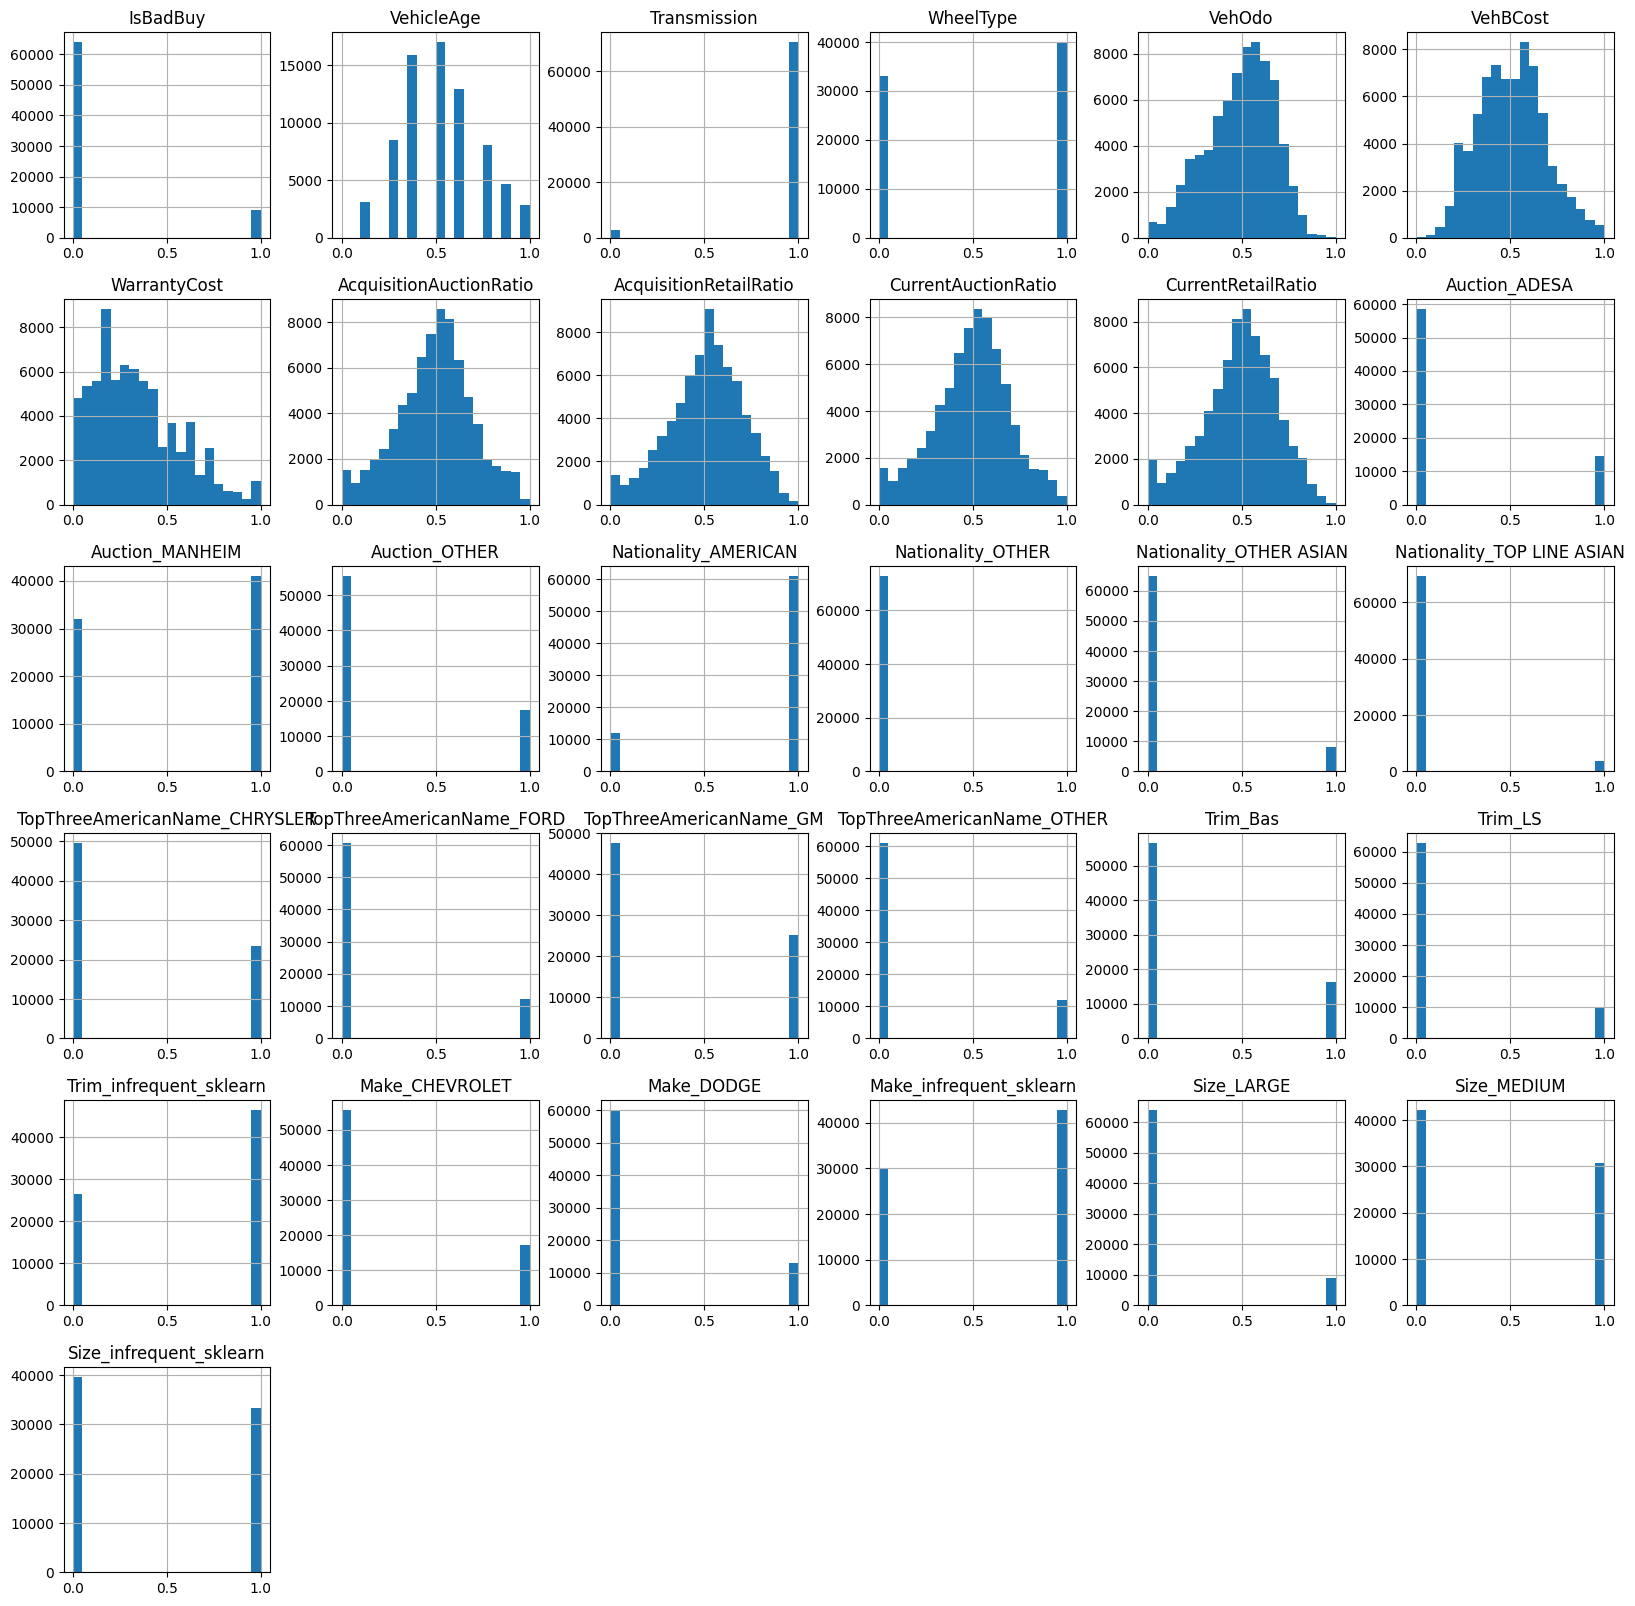

In [63]:
#ovde mozemo da vidimo opseg podataka
df.hist(bins = 20, figsize=(20,20))
plt.show()

In [64]:
df.dtypes #jos jednom potvrda da su svi atributi pretvoreni u numericke

IsBadBuy                           int64
VehicleAge                       float64
Transmission                     float64
WheelType                        float64
VehOdo                           float64
VehBCost                         float64
WarrantyCost                     float64
AcquisitionAuctionRatio          float64
AcquisitionRetailRatio           float64
CurrentAuctionRatio              float64
CurrentRetailRatio               float64
Auction_ADESA                    float64
Auction_MANHEIM                  float64
Auction_OTHER                    float64
Nationality_AMERICAN             float64
Nationality_OTHER                float64
Nationality_OTHER ASIAN          float64
Nationality_TOP LINE ASIAN       float64
TopThreeAmericanName_CHRYSLER    float64
TopThreeAmericanName_FORD        float64
TopThreeAmericanName_GM          float64
TopThreeAmericanName_OTHER       float64
Trim_Bas                         float64
Trim_LS                          float64
Trim_infrequent_

# 4. Treniranje više algoritama i interpretacija dobijenih rezultata

## 4.1 Podela skupa podataka na trening i test

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [66]:
df.head()

,IsBadBuy,VehicleAge,Transmission,WheelType,VehOdo,VehBCost,WarrantyCost,AcquisitionAuctionRatio,AcquisitionRetailRatio,CurrentAuctionRatio,...,TopThreeAmericanName_OTHER,Trim_Bas,Trim_LS,Trim_infrequent_sklearn,Make_CHEVROLET,Make_DODGE,Make_infrequent_sklearn,Size_LARGE,Size_MEDIUM,Size_infrequent_sklearn
0,0,0.375,1.0,1.0,0.705222,0.543864,0.278205,0.531594,0.515340,0.684777,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0.625,1.0,1.0,0.760407,0.594574,0.252564,0.488407,0.558290,0.459960,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0.500,1.0,0.0,0.520274,0.320740,0.396154,0.000000,0.382364,0.164809,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0.625,1.0,1.0,0.420876,0.239604,0.071795,0.095367,0.373345,0.060168,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,0.500,0.0,0.0,0.466388,0.229462,0.238462,0.333366,0.635974,0.216884,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [67]:
df.columns

Index(['IsBadBuy', 'VehicleAge', 'Transmission', 'WheelType', 'VehOdo',
       'VehBCost', 'WarrantyCost', 'AcquisitionAuctionRatio',
       'AcquisitionRetailRatio', 'CurrentAuctionRatio', 'CurrentRetailRatio',
       'Auction_ADESA', 'Auction_MANHEIM', 'Auction_OTHER',
       'Nationality_AMERICAN', 'Nationality_OTHER', 'Nationality_OTHER ASIAN',
       'Nationality_TOP LINE ASIAN', 'TopThreeAmericanName_CHRYSLER',
       'TopThreeAmericanName_FORD', 'TopThreeAmericanName_GM',
       'TopThreeAmericanName_OTHER', 'Trim_Bas', 'Trim_LS',
       'Trim_infrequent_sklearn', 'Make_CHEVROLET', 'Make_DODGE',
       'Make_infrequent_sklearn', 'Size_LARGE', 'Size_MEDIUM',
       'Size_infrequent_sklearn'],
      dtype='object')

In [68]:
X = df.drop('IsBadBuy', axis=1)
y = df['IsBadBuy']

# Podela podataka na trening i test koristeci train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

print("Velicina trening skupa podataka:", X_train.shape)
print("Velicina test skupa podataa:", X_test.shape)

Velicina trening skupa podataka: (51088, 30)
Velicina test skupa podataa: (21895, 30)


Podelili smo skup podataka na trening i test skupove u odnosu 70:30 i koristili smo stratifikaciju kako bismo obezbedili da proporcija klasa ostane ista u oba skupa. <br>
U trening skupu podataka se nalazi 51 088 instanci. <br>
U test skupu se nalazi 21 895 instanci. 

## 4.2 Treniranje modela i kros-validacija


### 4.2.1 Logistička regresija

In [69]:
# Kreiranje i treniranje modela logisticke regresije
lr_model = LogisticRegression(max_iter=1000, random_state=42,class_weight='balanced')

# Kros-validacija
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_lr = cross_val_score(lr_model, X_train, y_train, cv=cv, scoring='accuracy')

print("Logisticka regresija: Prosecna tacnost (kros-validacija):", scores_lr.mean())

lr_model.fit(X_train,y_train)

# Predikcija na test skupu podataka
y_pred_lr = lr_model.predict(X_test)

# Evaluacija modela
accuracy_lr = accuracy_score(y_test,y_pred_lr)
precision_lr = precision_score(y_test,y_pred_lr)
recall_lr = recall_score(y_test,y_pred_lr)
roc_auc_lr = roc_auc_score(y_test,y_pred_lr)

print("Logisticka regresija: Tacnost: ",accuracy_lr)
print("Logisticka regresija: Preciznost: ",precision_lr)
print("Logisticka regresija: Odziv: ",recall_lr)
print("Logisticka regresija: AUC: ",roc_auc_lr)

Logisticka regresija: Prosecna tacnost (kros-validacija): 0.6358440762829647
Logisticka regresija: Tacnost:  0.6284539849280658
Logisticka regresija: Preciznost:  0.19016169437485766
Logisticka regresija: Odziv:  0.6201262532491645
Logisticka regresija: AUC:  0.6248740838165414


Odlučili smo se za Logističku regresiju zbog njene jednostavnosti i efikasnosti u klasifikacionim problemima. Evaluacione metrike koje smo izabrali su tačnost, preciznost, odziv i AUC zato što pružaju sveobuhvatnu sliku performansi modela. Kros-validaciju smo odradili sa 5 podskupova (StratifiedKFold) kako bismo dobili stabilniju procenu performansi modela na različitim delovima podataka. <br>

Model je u proseku tačan u 63.49% slučajeva tokom validacije na različitim podskupovima trening skupa dok je u 63.13% slučajeva tačan na novim, neviđenim podacima.
Preciznost od 19.11% nam govori da od svih automobila koje je model klasifikovao kao "loše kupovine", samo 19.11% su zaista loše kupovine. Niska preciznost ukazuje na visok broj lažno pozitivnih predikcija (automobili koji su označeni kao "loše kupovine", a u stvarnosti nisu) <br>
Odziv od 62.13% nam govori da model uspeva da identifikuje 62.13% stvarno loših kupovina. Nizak odziv ukazuje na visok broj lažno negativnih predikcija (automobili koji su označeni kao "loše kupovine", a u stvarnosti su loše)<br>
AUC od 0.627 je blizu 0.5, što nam govori da model jedva nadmašuje nasumično pogađanje. Ovo je pokazatelj da model nije uspešan u razlikovanju između "dobrih" i "loših" kupovina.<br>

Rezultati ukazuju na to da, iako logistička regresija postiže relativno visoku tačnost, njena niska preciznost, odziv i AUC sugerišu da model nije efikasan u pravilnom identifikovanju loših kupovina. 

### 4.2.2 Stablo odlučivanja

In [70]:
# Kreiranje i treniranje stabla odlucivanja
dt_model = DecisionTreeClassifier(random_state=42,max_depth=10,class_weight='balanced')

scores_dt = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Stablo odlucivanja: Prosecna tacnost (kros-validacija):", scores_dt.mean())

dt_model.fit(X_train,y_train)

# Predikcija na test skupu podataka
y_pred_dt = dt_model.predict(X_test)

# Evaluacija modela
accuracy_dt = accuracy_score(y_test,y_pred_dt)
precision_dt = precision_score(y_test,y_pred_dt)
recall_dt = recall_score(y_test,y_pred_dt)
roc_auc_dt = roc_auc_score(y_test,y_pred_dt)

print("Stablo odlucivanja: Tacnost: ",accuracy_dt)
print("Stablo odlucivanja: Preciznost: ",precision_dt)
print("Stablo odlucivanja: Odziv: ",recall_dt)
print("Stablo odlucivanja: AUC: ",roc_auc_dt)

Stablo odlucivanja: Prosecna tacnost (kros-validacija): 0.6401888895485482
Stablo odlucivanja: Tacnost:  0.6417903630965974
Stablo odlucivanja: Preciznost:  0.1856689453125
Stablo odlucivanja: Odziv:  0.564797623468251
Stablo odlucivanja: AUC:  0.6086929477616226


Odlučili smo se za Stablo odlučivanja zbog njegove interpretabilnosti i sposobnosti da se nosi sa nelinearnim odnosima u podacima. <br>
Rezultati evaluacionih metrika su za nijansu gori od rezultata logističke regresije.

### 4.2.3 Random Forest

In [71]:
# Kreiranje Random Forest modela
rf_model = RandomForestClassifier(random_state=42, max_depth=10,n_estimators=10,class_weight='balanced')

# Kros-validacija
scores_rf = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

print("Random Forest: Prosecna tacnost (kros-validacija):", scores_rf.mean())

# Treniranje modela i predikcija na test skupu
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluacija modela
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("Random Forest: Tacnost:", accuracy_rf)
print("Random Forest: Preciznost:", precision_rf)
print("Random Forest: Odziv:", recall_rf)
print("Random Forest: AUC:", roc_auc_rf)


Random Forest: Prosecna tacnost (kros-validacija): 0.71731144479916
Random Forest: Tacnost: 0.70851792646723
Random Forest: Preciznost: 0.21557440246723208
Random Forest: Odziv: 0.5191236539175641
Random Forest: AUC: 0.6271016665588237


Odlučili smo se za Random Forest model zbog njegove robusnosti i sposobnosti da smanji varijansu u predikcijama. Rezultati evaluacionih metrika nisu mnogo bolji od rezultata prethodna dva modela. Tacnost je malo veca, ali odziv cije poboljsanje primarno zelimo je za nijansu gori

## 4.3 Vizualizacija rezultata

### 4.3.1 Logistička regresija

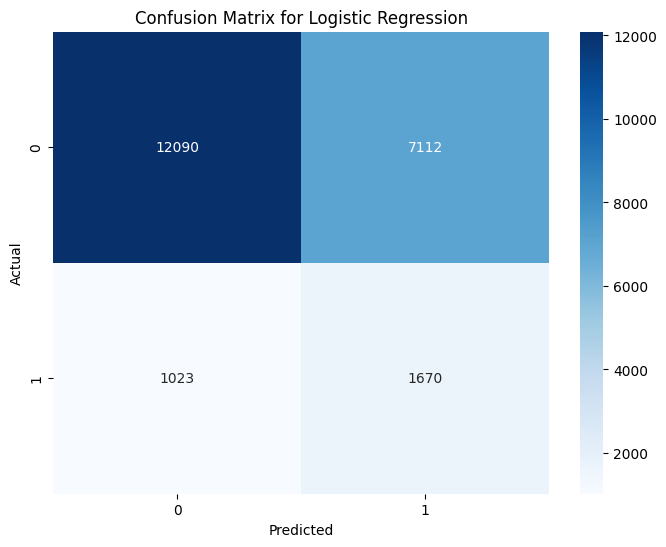

In [72]:
from sklearn.metrics import confusion_matrix, RocCurveDisplay

# Prikaz konfuzione matrice
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



True Negatives (TN): Model je tačno klasifikovao 12104 automobila kao "dobre kupovine". <br>

False Positives (FP): Model je pogrešno klasifikovao 7108 automobila kao "loše kupovine", iako su zapravo "dobre kupovine". Ovi slučajevi ukazuju na lažno pozitivne predikcije, što znači da model označava dobre automobile kao loše, što može dovesti do nepotrebnog odbacivanja dobrih automobila.<br>

False Negatives (FN): Model je pogrešno klasifikovao 994 automobila kao "dobre kupovine", iako su zapravo "loše kupovine". Ovi slučajevi su kritični jer predstavljaju lažno negativne predikcije, gde model ne uspeva da prepozna loše kupovine, što može dovesti do zadržavanja automobila koji su neispravni ili nepoželjni za prodaju.<br>

True Positives (TP): Model je tačno klasifikovao 1689 automobila kao "loše kupovine". Ovi slučajevi predstavljaju stvarne loše kupovine koje je model uspešno prepoznao.<br>

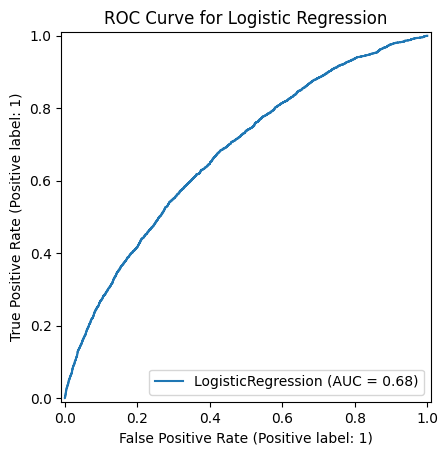

In [73]:
# Prikaz ROC krive
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')
plt.show()

Kriva je bliža dijagonali, što ukazuje na to da model ima ograničenu sposobnost razlikovanja između pozitivnih i negativnih klasa. Idealna ROC kriva bi bila bliža gornjem levom uglu.<br>

AUC (Area Under Curve): Vrednost AUC je 0.68, što ukazuje na to da model ima umerene performanse. Vrednost AUC od 0.5 predstavlja nasumično pogađanje, dok vrednost od 1 predstavlja savršen model.<br>

U našem slučaju, AUC od 0.68 sugeriše da model nije u potpunosti pouzdan u razlikovanju "loših kupovina" od "dobrih kupovina".

### 4.3.2 Stablo odlučivanja

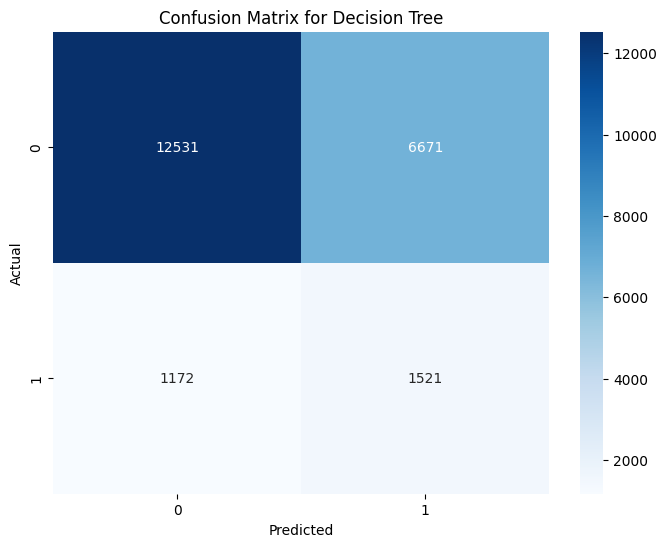

In [74]:
# Prikaz konfuzione matrice
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_dt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


True Positives (TP): 1704<br>
True Negatives (TN): 11307<br>
False Positives (FP): 7905<br>
False Negatives (FN): 979<br>
Rezultati pokazuju da model stabla odlučivanja ima visoku tačnost u prepoznavanju negativnih instanci, ali ima problem sa prepoznavanjem pozitivnih instanci. Ukupan broj tačnih pozitivnih predikcija je 1704, dok je broj lažno negativnih predikcija relativno visok (979). Model dobro prepoznaje negativne primere (11307 tačnih negativnih predikcija).

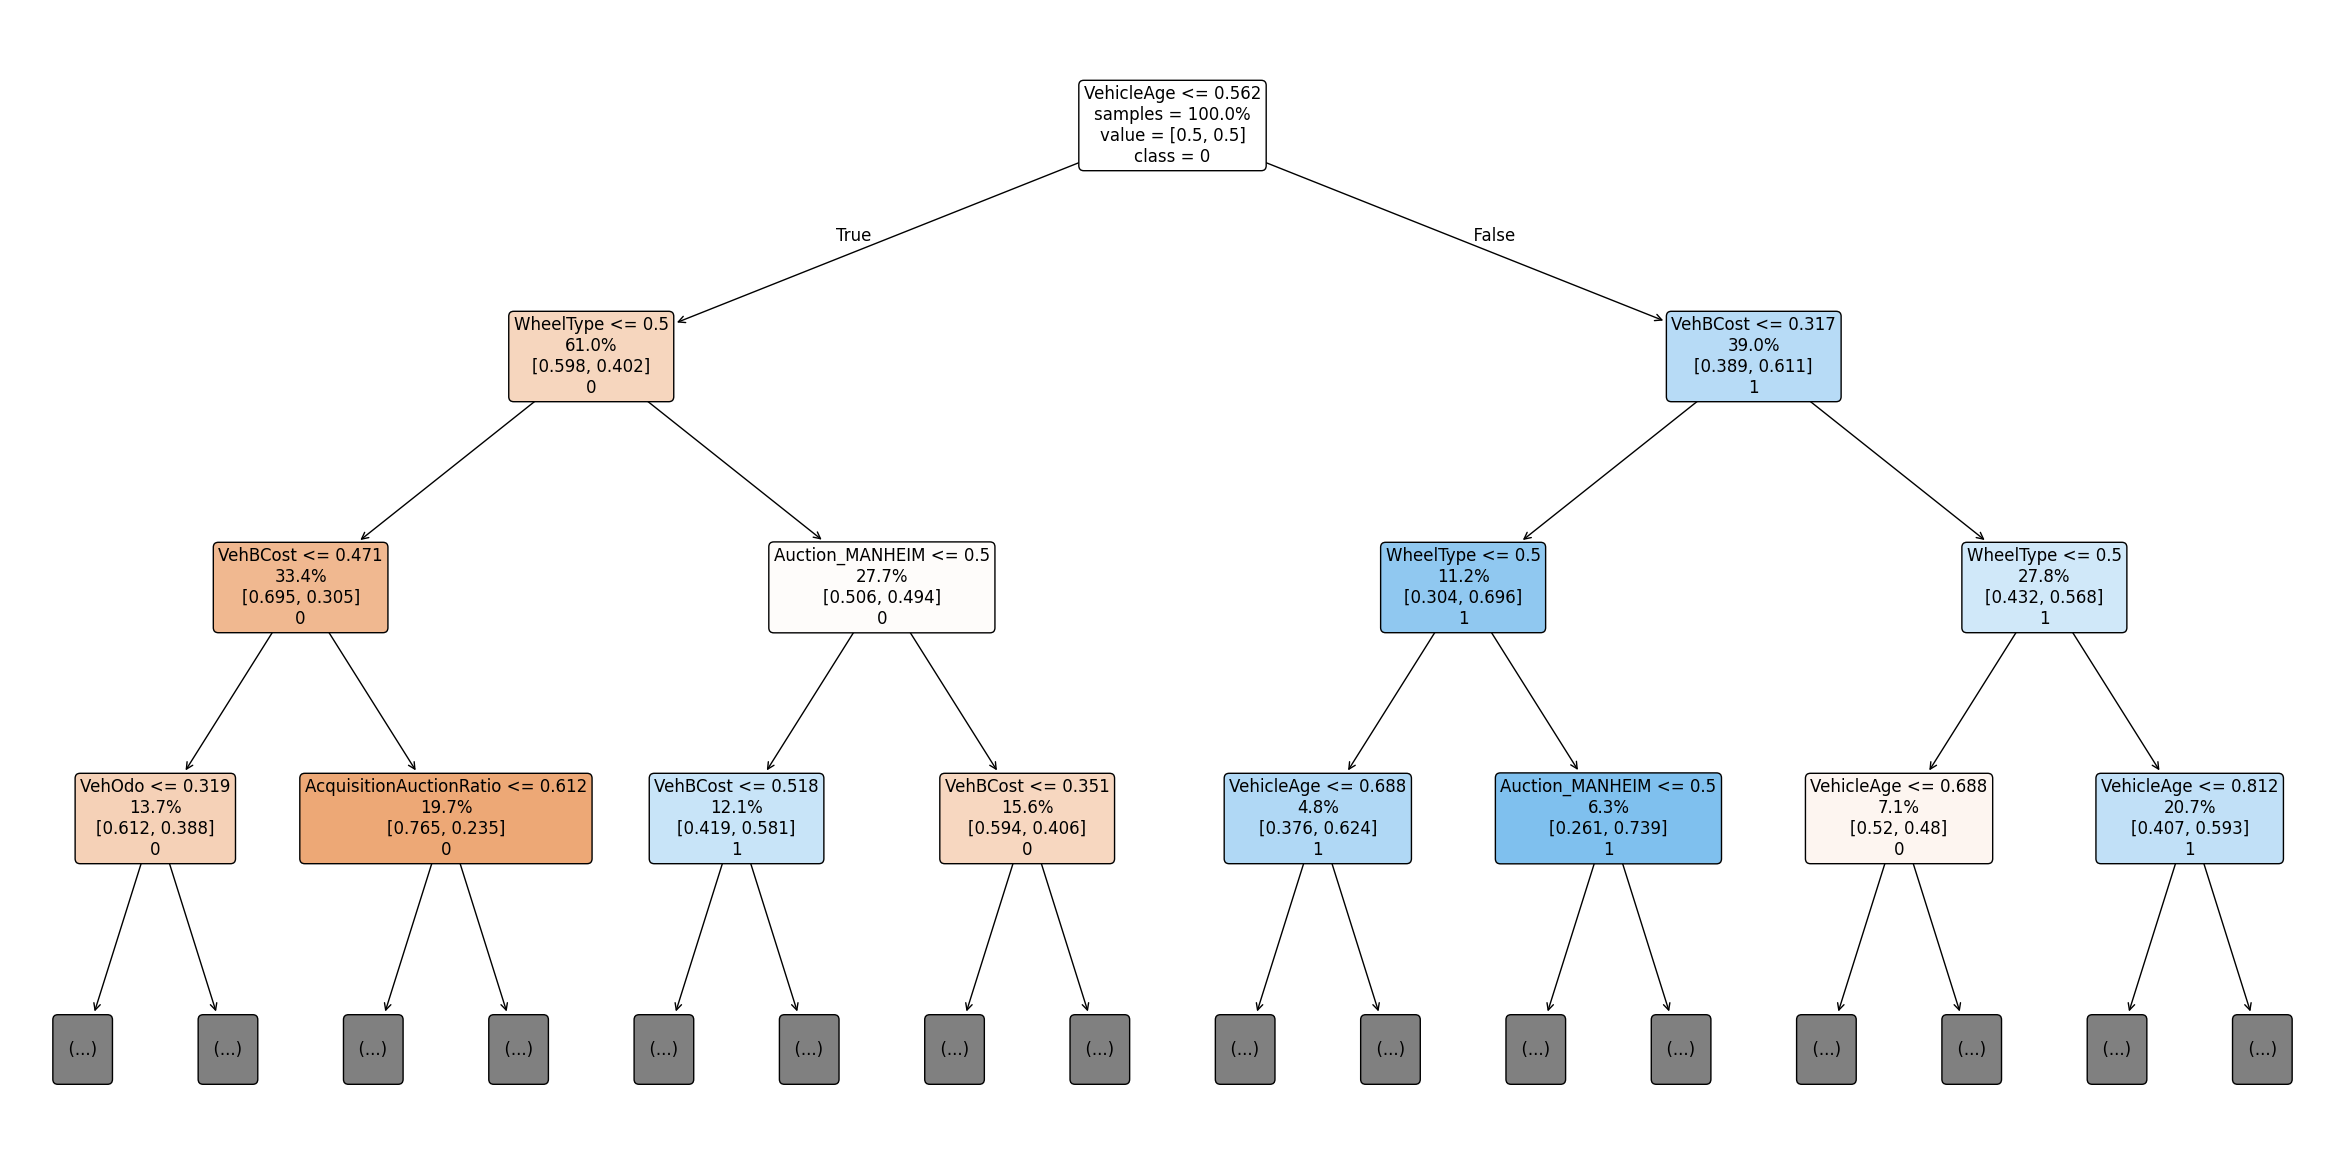

In [75]:
plt.figure(figsize=(30, 15))

tree.plot_tree(dt_model, feature_names=X_train.columns, class_names=['0', '1'], filled=True, fontsize=12, proportion=True, impurity=False, rounded=True, label='root',max_depth=3)
plt.show()

Stablo pokazuje kako model koristi različite atribute da donese odluke. Najvažniji atributi za donošenje odluka su VehicleAge, WheelType, VehBCost i AcquisitionAuctionRatio.<br>

Prva podela je na osnovu atributa VehicleAge, gde je granica postavljena na vrednost 0.562.<br>
Sledeća podela je na osnovu atributa WheelType sa granicom na 0.5.<br>

Na kraju grana stabla, listovi predstavljaju konačne odluke modela. Svaki list pokazuje procenat uzoraka koji pripadaju klasi 0 ili klasi 1. Model uglavnom predviđa klasu 0 ("dobre kupovine"), što se vidi po većem broju uzoraka klasifikovanih kao 0 u većini čvorova.

### 4.3.3 Random Forrest

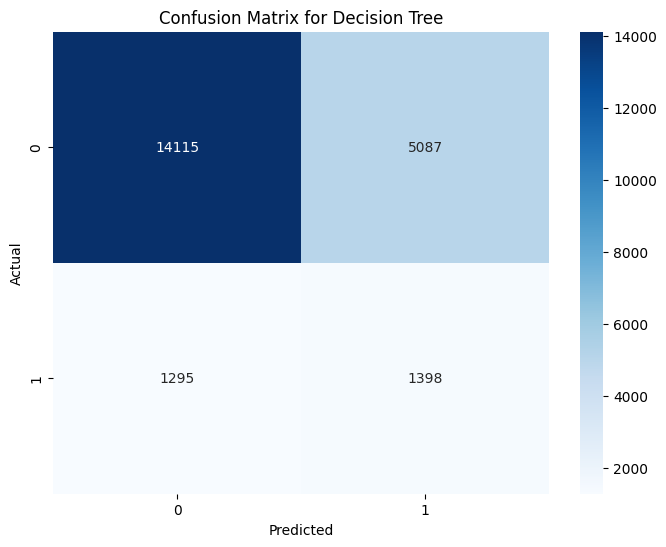

In [76]:
# Prikaz konfuzione matrice
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_rf
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

True Positives (TP): 1485<br>
True Negatives (TN): 13830<br>
False Positives (FP): 5382<br>
False Negatives (FN): 1198<br>

Rezultati pokazuju da ovaj model ima visoku tačnost u prepoznavanju pozitivnih primera, ali ima problema sa prepoznavanjem negativnih instanci (dobrih kupvoina). Ukupan broj tačnih pozitivnih predikcija je relativno visok (1485) kao i broj lažno negativnih predikcija(1198). Model dobro prepoznaje negativne instance (13830 tačnih negativnih predikcija).<br>

Model takođe ima visok broj lažno pozitivnih predikcija (5382), što ukazuje na to da često greši predviđajući pozitivne instance kada su one zapravo negativne.

## 4.4 Interpretacija i poređenje dobijenih rezultata

                 Model  Accuracy  Precision    Recall       AUC
0  Logistic Regression  0.628454   0.190162  0.620126  0.624874
1        Decision Tree  0.641790   0.185669  0.564798  0.608693
2        Random Forest  0.708518   0.215574  0.519124  0.627102


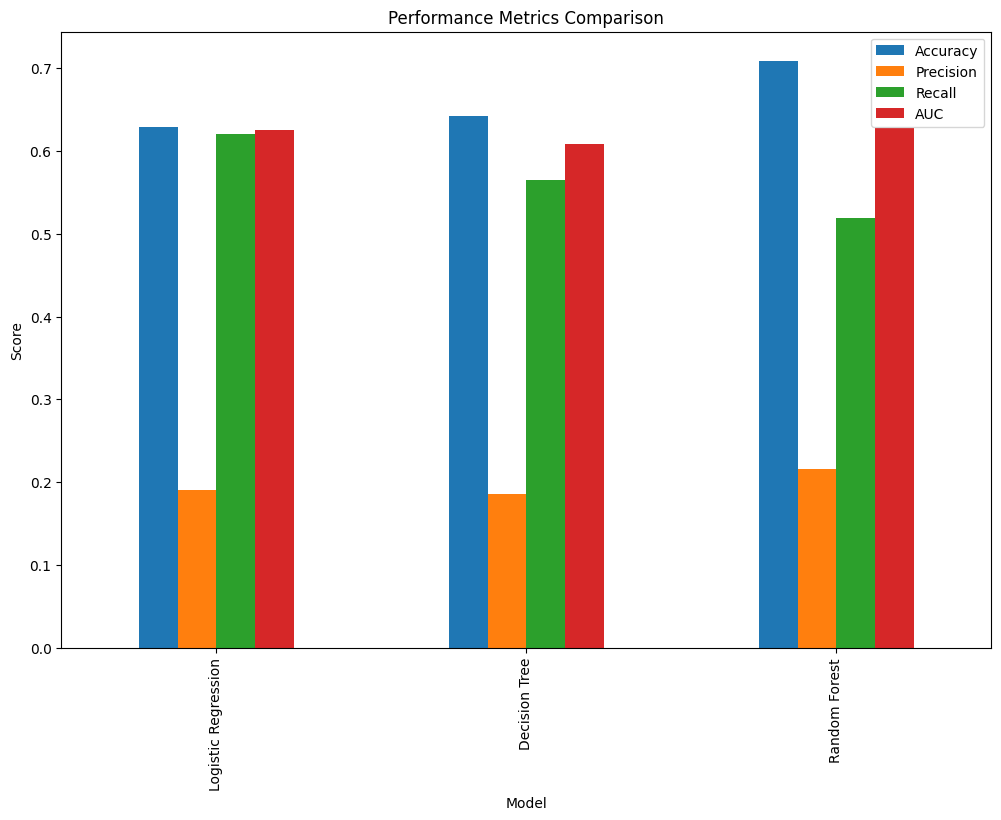

In [77]:
# Kreiranje tabele sa rezultatima
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf],
    'Precision': [precision_lr, precision_dt, precision_rf],
    'Recall': [recall_lr, recall_dt, recall_rf],
    'AUC': [roc_auc_lr, roc_auc_dt, roc_auc_rf]
})

print(results)

# Vizuelni prikaz rezultata
results.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Performance Metrics Comparison')
plt.ylabel('Score')
plt.show()


Logistička regresija ima dobru tačnost, ali nisku preciznost i odziv, što znači da model često greši u klasifikaciji loših kupovina. AUC je relativno visok, što ukazuje na to da model ima dobru sposobnost razlikovanja između klasa.<br>
Stablo odlučivanja pokazuje sličnu tačnost kao i logistička regresija, ali ima malo višu preciznost i niži odziv. AUC je takođe visok, što sugeriše da stablo odlučivanja bolje razlikuje klase u poređenju sa logističkom regresijom.<br>
Random Forest ima najvišu tačnost i AUC među sva tri modela, kao i najbolju preciznost. Ipak, odziv je nizak, što znači da model i dalje nije efikasan u prepoznavanju svih loših kupovina.<br>

Ovi rezultati nam govore da Random Forest pruža najbolje ukupne performanse, ali i dalje postoji potreba za poboljšanjem u prepoznavanju loših kupovina.

# 5. Selekcija atributa i interpretacija dobijenih rezultata

## 5.1 VarianceThreshold

In [78]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.feature_selection import SelectFromModel


Uklanjanje atributa sa niskom varijansom, jer ovi atributi ne doprinose mnogo modelu.

In [79]:
# Kreiranje selektora za uklanjanje atributa sa varijansom manjom od 0.05
selection = VarianceThreshold(threshold=0.05)
X_variance_reduced = selection.fit_transform(X_train)
print("Broj atributa nakon selekcije VarianceThreshold:", X_variance_reduced.shape[1])
print(selection.get_support())

Broj atributa nakon selekcije VarianceThreshold: 20
[False False  True False False  True False False False False  True  True
  True  True False  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True]


## 5.2 SelectKBest

In [80]:
# Koristimo f_classif za odabir 10 najboljih atributa
selection_f_classif = SelectKBest(score_func=f_classif, k=10)
X_kbest_f_classif = selection_f_classif.fit_transform(X_train, y_train)

In [81]:
# Koristimo mutual_info_classif za odabir 10 najboljih atributa
selection_mutual_info = SelectKBest(score_func=mutual_info_classif, k=10)
X_kbest_mutual_info = selection_mutual_info.fit_transform(X_train, y_train)

In [82]:
# Koristimo chi2 za odabir 10 najboljih atributa
selection_chi2 = SelectKBest(score_func=chi2, k=10)
X_kbest_chi2 = selection_chi2.fit_transform(X_train, y_train)

Koristeći različite metode za ocenjivanje atributa (f_classif, mutual_info_classif, chi2) biramo k najboljih atributa.

## 5.3 SelectFromModel (L1)

In [83]:
model_lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
selection_model = SelectFromModel(model_lr)
X_model_reduced = selection_model.fit_transform(X_train, y_train)
print("Broj atributa nakon selekcije SelectFromModel:", X_model_reduced.shape[1])


Broj atributa nakon selekcije SelectFromModel: 20


Koristimo model logističke regresije sa L1 penalizacijom za odabir važnih atributa.

## 5.4 Vizualizacija koeficijenata

<Axes: ylabel='att'>

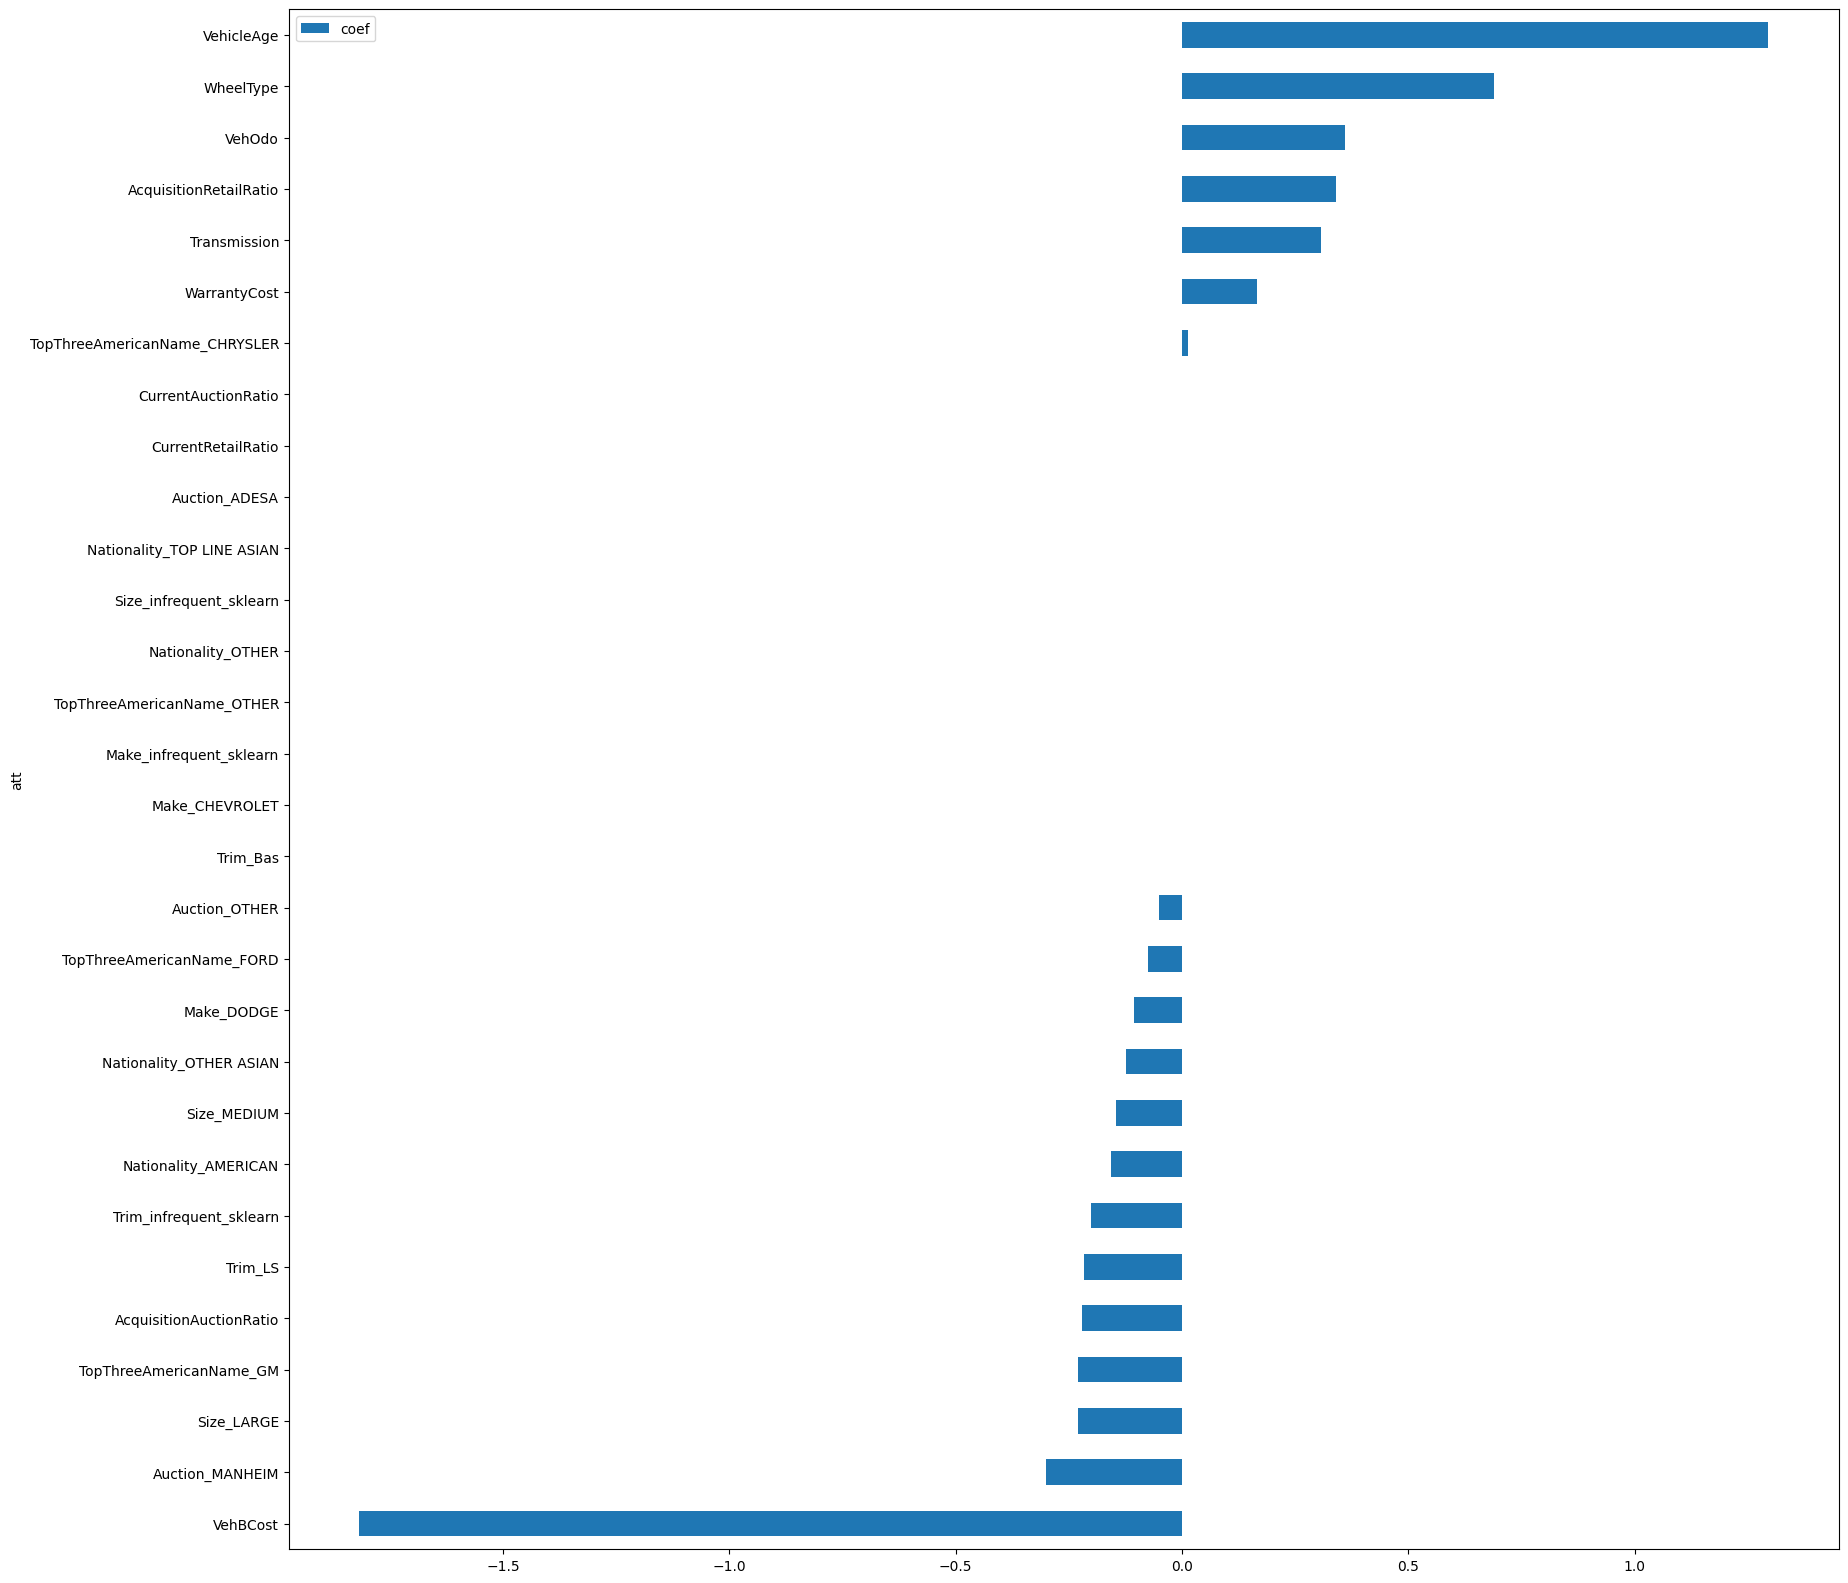

In [84]:
model_lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
model_lr.fit(X_train, y_train)
coefs = pd.DataFrame({'att': X_train.columns, 'coef': model_lr.coef_[0]}).sort_values(by='coef', ascending=True)
coefs.plot.barh(x='att', y='coef', figsize=(20, 20))


Vizualizacija koeficijenata za logističku regresiju pruža nam uvid u važnost pojedinačnih atributa u modelu. <br>

VehicleAge: Ovaj atribut ima najveći koeficijent, što znači da ima najznačajniji uticaj na predikciju. Pozitivan koeficijent ukazuje na to da sa povećanjem starosti vozila raste verovatnoća da će vozilo biti loša kupovina(pozitivna klasa). <br>

WheelType (Tip točkova): Takođe ima značajan pozitivan uticaj na predikciju, što nam govori da određeni tipovi točkova mogu biti povezani sa lošijom kvalitetom vozila.<br>

Negativni koeficijenti kod drugih atributa nam govore da povećanje vrednosti tih atributa smanjuje verovatnoću loše kupovine. Atributi vezani za cenu i kvalitet vozila (npr. AcquisitionAuctionRatio) pokazuju da veća vrednost ovih atributa može smanjiti verovatnoću loše kupovine. <br>

VehBCost (trosak nabavke vozila placen prilikom kupovine): Ima znacajan negativan uticaj, odnosno sto je veci trosak nabavke smanjuje se verovatnoca da ce automobil biti losa kupovina. 


## 5.5 Uporedjivanje rezultata

In [85]:
# Kreiranje modela za svaku selekciju atributa
models = {
    'Logisticka regresija': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Stablo odlucivanja': DecisionTreeClassifier(random_state=42,class_weight='balanced',max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42,class_weight='balanced', max_depth=10,n_estimators=10)
}

In [86]:
# Kros-validacija sa originalnim podacima
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    print(f'{name} (Original): Prosecan odziv : {scores.mean()}')

print('')

Logisticka regresija (Original): Prosecan odziv : 0.6247072445261946
Stablo odlucivanja (Original): Prosecan odziv : 0.602742349847225
Random Forest (Original): Prosecan odziv : 0.5166333500549787



In [87]:
# Kros-validacija sa smanjenim podacima (VarianceThreshold)
for name, model in models.items():
    scores = cross_val_score(model, X_variance_reduced, y_train, cv=5, scoring='recall')
    print(f'{name} (VarianceThreshold): Prosecan odziv: {scores.mean()}')

print('')

Logisticka regresija (VarianceThreshold): Prosecan odziv: 0.6165874922092334
Stablo odlucivanja (VarianceThreshold): Prosecan odziv: 0.5820531140264201
Random Forest (VarianceThreshold): Prosecan odziv: 0.5721768288666271



In [88]:
# Kros-validacija sa smanjenim podacima (SelectKBest f_classif)
for name, model in models.items():
    scores = cross_val_score(model, X_kbest_f_classif, y_train, cv=5, scoring='recall')
    print(f'{name} (SelectKBest f_classif): Prosecan odziv: {scores.mean()}')

print('')

Logisticka regresija (SelectKBest f_classif): Prosecan odziv: 0.6298001256656989
Stablo odlucivanja (SelectKBest f_classif): Prosecan odziv: 0.5927169633491935
Random Forest (SelectKBest f_classif): Prosecan odziv: 0.5010342084327765



In [89]:
# Kros-validacija sa smanjenim podacima (SelectKBest mutual_info_classif)
for name, model in models.items():
    scores = cross_val_score(model, X_kbest_mutual_info, y_train, cv=5, scoring='recall')
    print(f'{name} (SelectKBest mutual_info_classif): Prosecan odziv: {scores.mean()}')
print('')

Logisticka regresija (SelectKBest mutual_info_classif): Prosecan odziv: 0.6242285240867702
Stablo odlucivanja (SelectKBest mutual_info_classif): Prosecan odziv: 0.6057642805385383
Random Forest (SelectKBest mutual_info_classif): Prosecan odziv: 0.5217230642161856



In [90]:
# Kros-validacija sa smanjenim podacima (SelectFromModel)
for name, model in models.items():
    scores = cross_val_score(model, X_model_reduced, y_train, cv=5, scoring='recall')
    print(f'{name} (SelectFromModel): Prosecan odziv: {scores.mean()}')

print('')

Logisticka regresija (SelectFromModel): Prosecan odziv: 0.622797556612904
Stablo odlucivanja (SelectFromModel): Prosecan odziv: 0.5853964296753468
Random Forest (SelectFromModel): Prosecan odziv: 0.5220450825694581



Logistička regresija pokazuje najveću osetljivost na selekciju atributa. Metoda VarianceThreshold je značajno poboljšala odziv modela u poređenju sa originalnim podacima.<br>

Stablo odlučivanja pokazuje poboljšanje u odzivu pri korišćenju VarianceThreshold metode, dok ostale metode selekcije atributa nisu značajno uticale na performanse modela.<br>

Random Forest pokazuje stabilne rezultate bez značajnih promena u performansama pri korišćenju različitih metoda selekcije atributa. Metoda VarianceThreshold je pokazala neznatno poboljšanje u odnosu na ostale.<br>

Shodno rezultatima, odlučili smo se za kreiranje novih modela sa VarianceThreshold metodom za selekciju atributa.

## 5.6 Kreiranje modela sa selekcijom atributa

### 5.6.1 Logistička regresija (VarianceThreshold)

In [91]:
selection_lr = VarianceThreshold(threshold=0.05)
X_train_lr = selection_lr.fit_transform(X_train, y_train)
X_test_lr = selection_lr.transform(X_test)

lr_model.fit(X_train_lr, y_train)

# Predikcija na test skupu podataka
y_pred_lr2= lr_model.predict(X_test_lr)

# Evaluacija modela
accuracy_lr2 = accuracy_score(y_test, y_pred_lr2)
precision_lr2 = precision_score(y_test, y_pred_lr2)
recall_lr2 = recall_score(y_test, y_pred_lr2)
roc_auc_lr2 = roc_auc_score(y_test, y_pred_lr2)

print("Logisticka regresija: Tacnost: ", accuracy_lr2)
print("Logisticka regresija: Preciznost: ", precision_lr2)
print("Logisticka regresija: Odziv: ", recall_lr2)
print("Logisticka regresija: AUC: ", roc_auc_lr2)


Logisticka regresija: Tacnost:  0.5748801096140671
Logisticka regresija: Preciznost:  0.16967941675821432
Logisticka regresija: Odziv:  0.6308949127367248
Logisticka regresija: AUC:  0.598959590521055


### 5.6.2 Stablo odlučivanja (VarianceThreshold)

In [92]:
selection_dt = VarianceThreshold(threshold=0.05)
X_train_dt = selection_dt.fit_transform(X_train)
X_test_dt = selection_dt.transform(X_test)

dt_model.fit(X_train_dt, y_train)

# Predikcija na test skupu podataka
y_pred_dt2 = dt_model.predict(X_test_dt)

# Evaluacija modela
accuracy_dt2 = accuracy_score(y_test, y_pred_dt2)
precision_dt2 = precision_score(y_test, y_pred_dt2)
recall_dt2 = recall_score(y_test, y_pred_dt2)
roc_auc_dt2 = roc_auc_score(y_test, y_pred_dt2)

print("Stablo odlucivanja: Tacnost: ", accuracy_dt2)
print("Stablo odlucivanja: Preciznost: ", precision_dt2)
print("Stablo odlucivanja: Odziv: ", recall_dt2)
print("Stablo odlucivanja: AUC: ", roc_auc_dt2)


Stablo odlucivanja: Tacnost:  0.5980817538250742
Stablo odlucivanja: Preciznost:  0.17704918032786884
Stablo odlucivanja: Odziv:  0.6216115855922763
Stablo odlucivanja: AUC:  0.6081966895777233


### 5.6.3 Random Forrest (SelectKBest)

In [93]:
selection_rf = VarianceThreshold(threshold=0.05)
X_train_rf = selection_rf.fit_transform(X_train, y_train)
X_test_rf = selection_rf.transform(X_test)

rf_model.fit(X_train_rf, y_train)

# Predikcija na test skupu podataka
y_pred_rf2 = rf_model.predict(X_test_rf)

# Evaluacija modela
accuracy_rf2 = accuracy_score(y_test, y_pred_rf2)

precision_rf2 = precision_score(y_test, y_pred_rf2)
recall_rf2 = recall_score(y_test, y_pred_rf2)
roc_auc_rf2 = roc_auc_score(y_test, y_pred_rf2)

print("Random Forest: Tacnost: ", accuracy_rf2)
print("Random Forest: Preciznost: ", precision_rf2)
print("Random Forest: Odziv: ", recall_rf2)
print("Random Forest: AUC: ", roc_auc_rf2)


Random Forest: Tacnost:  0.6415163279287509
Random Forest: Preciznost:  0.18705996601116776
Random Forest: Odziv:  0.5722242851838099
Random Forest: AUC:  0.6117292658082366


## 5.7 Vizualizacija novih rezultata

                 Model  Accuracy  Precision    Recall       AUC
0  Logistic Regression  0.574880   0.169679  0.630895  0.598960
1        Decision Tree  0.598082   0.177049  0.621612  0.608197
2        Random Forest  0.641516   0.187060  0.572224  0.611729


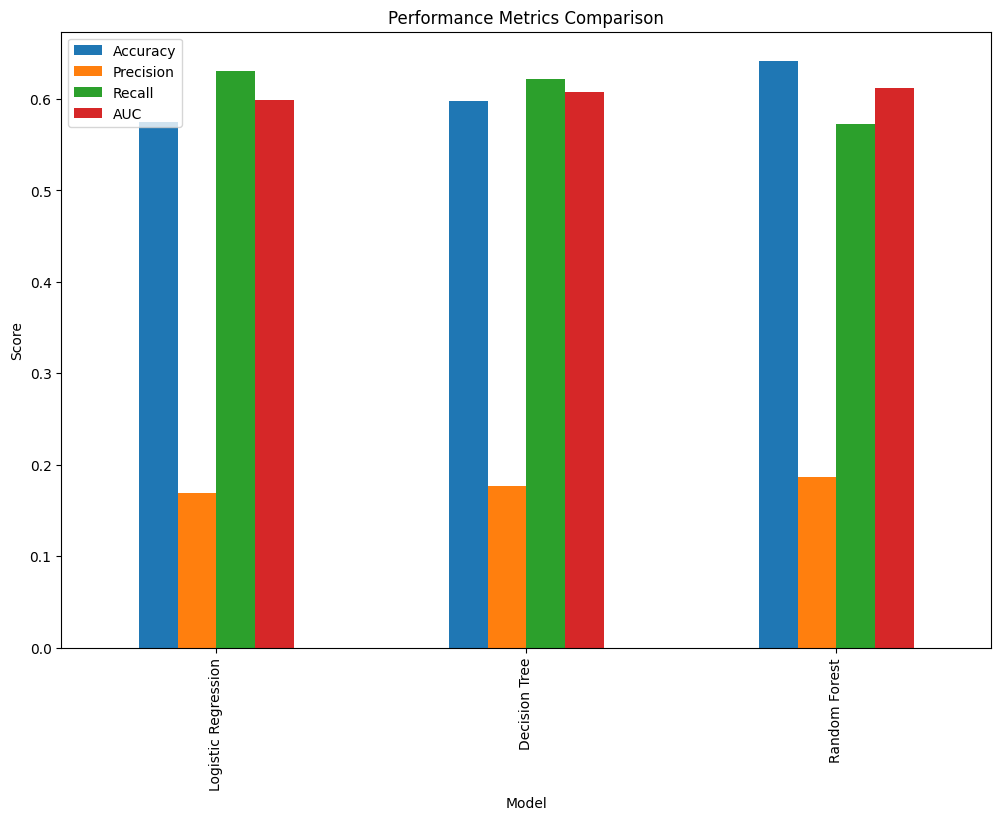

In [94]:
# Kreiranje tabele sa rezultatima
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_lr2, accuracy_dt2, accuracy_rf2],
    'Precision': [precision_lr2, precision_dt2, precision_rf2],
    'Recall': [recall_lr2, recall_dt2, recall_rf2],
    'AUC': [roc_auc_lr2, roc_auc_dt2, roc_auc_rf2]
})

print(results)

# Vizuelni prikaz rezultata
results.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Performance Metrics Comparison')
plt.ylabel('Score')
plt.show()


# 6. Optimizacija parametara i interpretacija dobijenih rezultata

Cilj nam je da pronadjemo najbolju kombinaciju hiperparametara koja daje najbolju perfomansu modela prema zadatim metrikama evaluacije. Za tu svrhu koristicemo GridSearchCV.<br>
Koraci:<br>
1) Prvo se definise mreza (skup mogucih vrednosti) hiperparametara<br>
2) Testiranje svih mogucih kombinacija hiperparametara (iscrpna pretraga)<br>
3) K unakrsna validacija (skup se deli na K delova, obucavanje na K-1, a testiranje na preostalom delu, uz ponavljanje ovog procesa tacno K puta)<br>
4) Racunanje prosecne perfomanse za svaku kombinaciju hiperparametara<br>
5) Odabir najbolje kombinacije

### Grid pretraga za klasifikaciono stablo

In [95]:
param_dt = {
    'max_depth': [5, 10, 12], #max dubina stabla
    'min_samples_split': [2, 10, 20], #min broj instanci u cvoru potreban da bi mogao dalje da se deli
    'min_samples_leaf': [3, 5, 10], #min broj uzoraka po listu
    'class_weight': [None, 'balanced'] # balansiranje tezina klasa
}

grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_dt, cv=5, scoring='recall')
grid_search_dt.fit(X_train, y_train)

print("Najbolji hiperparametri za Decision Tree po odzivu:", grid_search_dt.best_params_)
best_dt = grid_search_dt.best_estimator_
print("\n\nTest recall za najbolji Decision Tree model:", best_dt.score(X_test,y_test))

Najbolji hiperparametri za Decision Tree po odzivu: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}


Test recall za najbolji Decision Tree model: 0.6261246860013702


### Randomized pretraga za Random Forest

Posto je trebalo dosta vremena za izvrsvanje prethodne sekcije koda, odlucile smo da za RandomForest i Logisticku regresiju umesto GridSearchCV iskoristimo Neiscrpnu pretragu, odnosno RandomizedSearchCV. Ovom pretragom se ne ispituje kvalitet modela za svaku mogucu vrednost parametara, vec se ispituje ogranicen broj tacak, slucajno uzorkovanih iz raspodele mogucih vrednosti.

In [96]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

param_rf = {
    'n_estimators': [80, 100, 120],
    'max_features': [2, 4, 5],
    'max_depth': [5,7,10],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [3,5,10],
    'bootstrap': [True,False] #bootstrap - uzorkovanje sa vracanjem
}

random_search_rf = RandomizedSearchCV(estimator=rf_model,param_distributions=param_rf,  n_iter=50, cv=3, scoring='recall')
random_search_rf.fit(X_train,y_train)

print("Najbolji hiperparametri za Random Forest po odzivu su:",random_search_rf.best_params_)
best_rf = random_search_rf.best_estimator_
print("\n\nTest recall za najbolji Random Forest model:", best_rf.score(X_test,y_test))

Najbolji hiperparametri za Random Forest po odzivu su: {'n_estimators': 80, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 2, 'max_depth': 5, 'bootstrap': False}


Test recall za najbolji Random Forest model: 0.5931491208038365


### Randomized pretraga za logisticku regresiju

In [97]:
#HIPERPARAMETRI ZA LR:
#penalty (kazna)
#l1 - Lasso regularizacija, koja dodaje apsolutnu vrednost koeficijenata kao kaznu kriterijumskoj fji
#neka od tezina moze biti tacno 0, sto je korisno za automatsku selekciju atributa jer eliminise nebitne karakteristike; 
#L2 - Ridge regularizacija, koja dodaje kvadrat koeficijenata kao kaznu kriterijumskoj fji
#svi parametri imaju ne-nula vrednosti koje su manje i blize nuli, a model je obicno stabilniji i moze raditi bolje na nevidjenim podacima
#napomena: bez bilo koje regularizacije model bi razvio tezine koje su veoma velike ili veoma male,
#sto lako moze dovesti do overfitting-a

#C - inverz jacine regularizacije (manja vrednost -> jaca regularizacija, veca vrednost c ->manja regularizacija)
#veca vrednost smanjuje regularizaciju, odnosno modelu se vise dopusta da se prilagodi trening podacima bez kazne
#pa bas velika vrednost C moze dovesti do overfitting-a

In [98]:
param_lr = {
    'penalty': ['l1', 'l2'],
    'C': scipy.stats.uniform(0.0001,2),
    'max_iter': [100, 150]
}

random_search_lr = RandomizedSearchCV(estimator=lr_model, param_distributions=param_lr,n_iter=100,cv=5,scoring='recall')
random_search_lr.fit(X_train,y_train)

print("Najbolji hiperparametri za logisticku regresiju po odzivu:", random_search_lr.best_params_)
best_lr = random_search_lr.best_estimator_
print("\n\nTest recall za najbolji model logisticke regresije:", best_lr.score(X_test,y_test))

Najbolji hiperparametri za logisticku regresiju po odzivu: {'C': 0.03856211355815488, 'max_iter': 150, 'penalty': 'l2'}


Test recall za najbolji model logisticke regresije: 0.6259419958894725


### Tumacenje rezultata nakon optimizovanja hiperparametara

In [99]:
recalls_dict = {
    'Recall - DT': best_dt.score(X_test,y_test),
    'Recall - RF': best_rf.score(X_test,y_test),
    'Recall - LR': best_lr.score(X_test,y_test)
}
rdf = pd.DataFrame([recalls_dict])
rdf

,Recall - DT,Recall - RF,Recall - LR
0,0.626125,0.593149,0.625942


U poredjenju sa rezultatima pre optimizacije hiperparametara mozemo zakljuciti da se vrednost odziva za sva tri modela povecala, sto mozemo videti i na vizuelnom prikazu ispod.

#### Vizualni prikaz rezultata

                 Model  Recall before optimization  Recall after optimization
0  Logistic Regression                    0.620126                   0.625942
1        Decision Tree                    0.564798                   0.626125
2        Random Forest                    0.519124                   0.593149


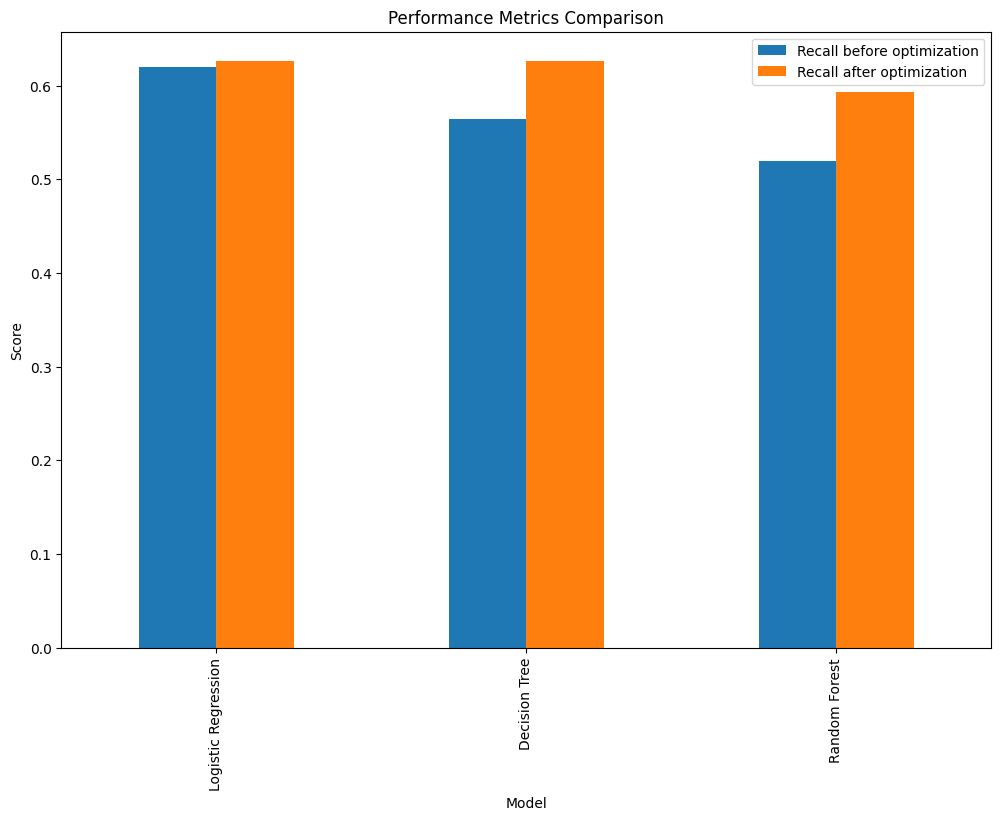

In [100]:
# Kreiranje tabele sa rezultatima
resultsopt = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Recall before optimization': [recall_lr, recall_dt, recall_rf],
    'Recall after optimization' :[best_lr.score(X_test,y_test),best_dt.score(X_test,y_test),best_rf.score(X_test,y_test)]
})

print(resultsopt)

# Vizuelni prikaz rezultata
resultsopt.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Performance Metrics Comparison')
plt.ylabel('Score')
plt.show()

### Optimizacija hiperparametara OneHotEncoder-a

In [101]:
#uporedicemo rezultate sa razlicitim brojem kategorija za parametre Trim, Make, Size

In [102]:
Xopt = dfOpt.drop('IsBadBuy', axis=1)
yopt = dfOpt['IsBadBuy']

X_trainOpt, X_testOpt, y_trainOpt, y_testOpt = train_test_split(Xopt, yopt, test_size=0.3, random_state=100)

results = {}
for n_cat in range(2,8,1):
    encoderOpt = OneHotEncoder(handle_unknown='ignore',max_categories=n_cat,sparse_output=False)
    X_train_encodedOpt = encoderOpt.fit_transform(X_trainOpt[['Trim', 'Make', 'Size']])
    X_test_encodedOpt = encoderOpt.transform(X_testOpt[['Trim', 'Make', 'Size']])
    mfr = RandomForestClassifier(random_state=100,max_depth=10,n_estimators=10,class_weight='balanced')
    mfr.fit(X_train_encodedOpt,y_trainOpt)
    y_predOpt = mfr.predict(X_test_encodedOpt)
    recallOpt = recall_score(y_testOpt,y_predOpt)
    results[n_cat] = recallOpt

for n_cat, recallOpt in results.items():
    print(f"Broj kategorija: {n_cat}, Odziv: {recallOpt}")
   

Broj kategorija: 2, Odziv: 0.508551881413911
Broj kategorija: 3, Odziv: 0.6320790573926264
Broj kategorija: 4, Odziv: 0.6640060813378943
Broj kategorija: 5, Odziv: 0.7050551121246674
Broj kategorija: 6, Odziv: 0.6951729380463701
Broj kategorija: 7, Odziv: 0.6944127708095781


Zakljucak: Odziv ima najbolju vrednost za broj kategorija 5.